# Convolutional Neural Networks

- **Introduction to CNNs**:
  - Proposed by Yann Lecun in 1989.
  - Specialized kind of neural networks for processing data with a known, grid-like topology.
  - Examples include time-series data (1D grid) and image data (2D grid of pixels).
  - Effective in image recognition and classification tasks.

- **Biological Inspiration**:
  - Motivated by experiments by Hubel and Wiesel on a cat’s visual cortex.
  - Visual cortex has regions of cells sensitive to specific regions in the visual field.
  - Neurons in the visual cortex are connected using a layered architecture.
  - Early layers encode primitive shapes, while later layers encode more complex shapes.

- **Neocognitron and LeNet-5**:
  - Neocognitron, proposed by Kunihiko Fukushima in 1979, was an early neural model inspired by biological principles.
  - However, it lacked weight sharing, a key feature of modern CNNs.
  - LeNet-5, developed by Yann Lecun in 1989, was one of the first fully convolutional architectures, incorporating weight sharing.

- **Architectural Ideas**: 
  - CNNs combine three architectural ideas: 
    - Local receptive fields
    - Shared weights
    - Spatial or temporal sub-sampling
  - These ideas ensure some degree of shift, scale, and distortion invariance.

- **Image Classification Challenges**:
  - Classifying images with ordinary fully connected feed-forward networks poses problems due to:
    - High dimensional input data (hundreds or millions of pixels)
    - Large number of parameters in fully connected layers (e.g., tens of thousands of weights)
    - Increased capacity requiring larger training sets
    - Memory requirements for storing many weights may limit hardware implementations

- **Deficiency of Fully-Connected Architectures**:
  - Fully-connected architectures ignore the topology of the input, allowing input variables to be presented in any fixed order without affecting the outcome of training.
  - Images have a strong 2D local structure, with nearby pixels being highly correlated.

- **Importance of Local Correlations**:
  - Local correlations in images are the reason for advantages of:
    - Extracting and combining local features before recognizing spatial or temporal objects
    - Classifying configurations of neighboring pixels into categories such as edges, corners, etc.

## Convolution Operator

In mathematics, convolution is a mathematical operation on two or more than two
functions that produces a new function expressing how the shape of one is modified by the
others. Usually, the convolution operation used in CNNs does not correspond precisely to
the definition of convolution as used in other fields such as engineering (signal processing)
or pure mathematics.

### Read the math section below if you're inclined to do so, otherwise optional!

Suppose that you are James T. Kirk from Star Trek, and you are captured in a planet, you
want to track the location of USS Enterprise with a laser sensor. The laser sensor provides
a single output $x(t)$, the position of the Enterprise at time $t$. Bot $x$ and $t$ are real-valued,
i.e., you can get a different reading from the laser sensor at any instant time. Now suppose
that your laser sensor is somewhat noisy. 

To obtain a less noisy estimate of the Enterprise’s
position, we would like to average together several measurements. Of course, more recent
measurements are more relevant, so we will want this with a weighted average that gives
more weight to recent measurements. If we apply such as weighted average operation at
every moment, we obtain a new function s providing a smoothed estimate of the position
of spaceship
<font size="4">
$$ s(t) = \int x(t_0) w(t-t_0) dt_0$$
</font>
This operation called convolution, denoted as
<font size="4">
$$s(t) = (x \ast w)(t)$$
</font>

Of course $w$ needs to be a valid probability density function and w needs to be 0 for all
negative arguments, or it will look into the future, which is not okay. But, usually when we
work with data on a computer, time will be discretized, and our sensor will provide data
at regular intervals. In our example, it might be more realistic to assume that our laser
provides a measurement once per second.

The time index $t$ can take on only integer values.
If we now assume that $x$ and $w$ are defined only on integer $t$, we can define the discrete
convolution as:

<font size="4">
$$s(t) = (x \ast w)(t) = \sum_{n= -\infty}^{\infty} x(n)w(t-n)$$
</font>

$w$ is sometimes referred as the kernel and the output of convoluton operator is sometimes
referred as the feature map. Oftenly, convolution operator can be over more than one axis
at a time. For example if we use two-dimesional image $I$ as our input, we probably also use a two-dimensional kernel $K$:

<font size="4">
$$F(i,j) = (I \ast K)(i,j)=\sum_{m}\sum_{n} I(m,n)K(i-m,j-n)$$
</font>

Instead convolution, many neural network libraries implement a related function called the
cross-correlation.
<font size="4">
$$F(i,j) = (I \ast K)(i,j)=\sum_{m}\sum_{n} I(i+m,j+n)K(m,n)$$
</font>

We can think cross-correlation as a Hadamard Product but after the production of input ant the kernel, output of the cross-entropy is the sum of all elements of output of the Hadamard Product

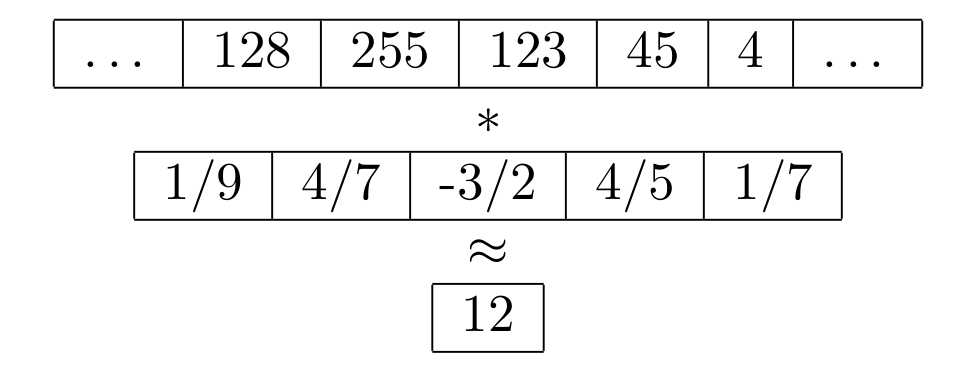

In [41]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/cross.png",width=500, height=500)

The convolution on engineering, signal processing is a very large subject to study. It will
be shown more later.

## The Architecture

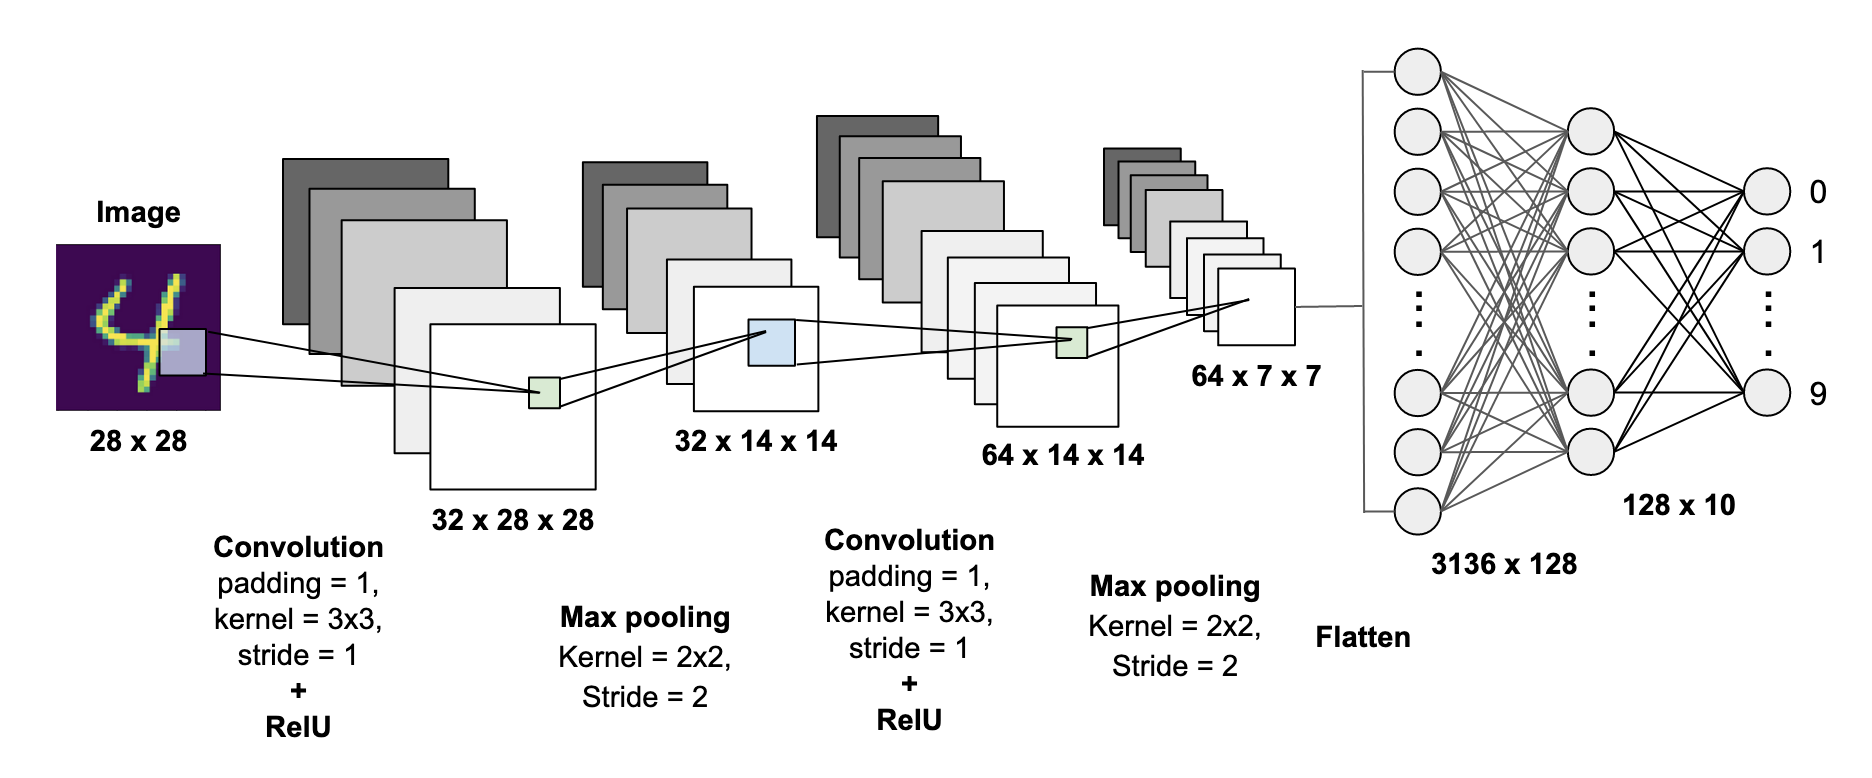

In [47]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/mnistarch.png",width=1000, height=1000)

## Architecture Details

### Convolution On Image

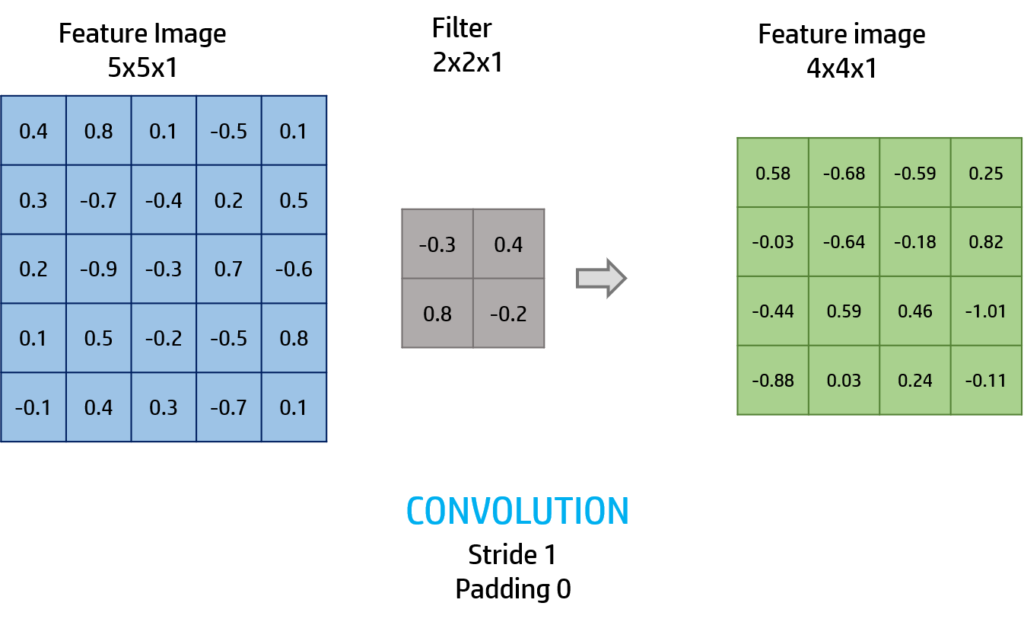

In [51]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/convimg.png",width=700, height=500)

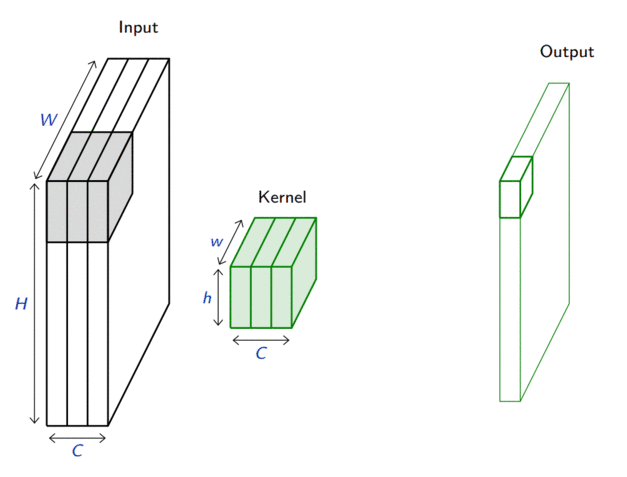

In [53]:
from IPython.display import Image;
Image("./images/3d-conv.gif")

### Pooling

- **Convolutional Layer**:
  - First stage in a CNN architecture.
  - Performs convolution operation, applying filters to input data to extract features.
  
- **Non-linear Activation**:
  - Second stage in a CNN architecture.
  - Applies a non-linear activation function, such as ReLU, to introduce non-linearity into the network and enable better feature representation.
  
- **Pooling (Sub-sampling)**:
  - Third stage in a CNN architecture.
  - Modifies the output of the layer further by summarizing statistics of nearby outputs.
  - Popular pooling functions include:
    - **Max Pooling**: Finds the maximum element within a rectangular or square neighborhood.
    - **Average Pooling**: Computes the average value of elements in a neighborhood.
    - **$L^2$ Norm Pooling**: Computes the $L^2$ norm of elements in a neighborhood.
    - **Weighted Average Pooling**: Computes the weighted average based on the distance from the central pixel.
  - Pooling helps make the representation approximately invariant to small translations of the input.
  - Invariance to translation means that small translations of the input result in minimal changes to the pooled outputs.

You can see a Lena example:

In [72]:
import numpy as np
def pool2d(im,kernel,mode='max'):
    kernel0,kernel1 = kernel
    feature_map = 255 * np.ones(shape=(int(im.shape[0]/kernel0)+1,
                                       int(im.shape[1]/kernel1)+1))
    for i in range(0,im.shape[0],kernel0):
        for j in range(0,im.shape[1],kernel1):
            if(mode == "max"):
                feature_map[int(i/kernel0),int(j/kernel1)] = np.max(im[i:i+kernel0,j:j+kernel1])
            if(mode == "avg"):
                feature_map[int(i/kernel0),int(j/kernel1)] = im[i:i+kernel0,j:j+kernel1].mean()
    return feature_map

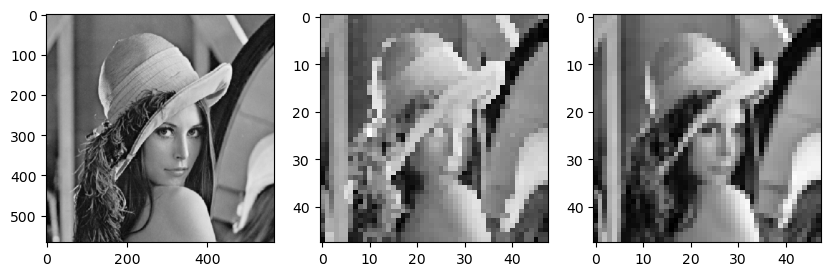

In [74]:
import cv2
import matplotlib.pyplot as plt
img1 = cv2.imread('./images/lena.png',0)
maxpool = pool2d(img1,(12,12),'max')
avgpool = pool2d(img1,(12,12),'avg')
fig, axs = plt.subplots(1,3,figsize=(10,10))
axs[0].imshow(img1,cmap='gray')
axs[1].imshow(maxpool,cmap='gray')
axs[2].imshow(avgpool,cmap='gray')

Invarianvce to local translation can be very useful property if we care more about whether some feature is presented exactly where it is. For example, when determining whether an image contains a face, we need not know the location of the eyes with pixel-perfect accuracy. We just need to know that there is an eye on the left and right side of the face. In other contexts, it is more important to preserve the location of a feature.

### Padding

One observation is that the convolution operation reduces the size of the $(q+1)$th layer in comparsion with the size of the $q$th layer. This type of reduction in size is not desirable in general, because it tends to lose some information along the borders of the image (or feature map in the hidden layers). This problem can be resolved by using the padding. Kernel size in the layer $q$ denoted as $K_q$; in padding, one adds $(K_q-1)/2$ "pixels" all around the borders of the image-feature map in order to maintain the spatial footprint. Note that these pixels are really feature values in the case of the padding hidden layers. The value of each of each of these padded feature values is set to 0, irrespective of whether the input or the feature maps at the hidden layers are being padded. As a result, the spatial height and width of the input volume will both increase by $(K_q-1)$, which is exactly what they reduce by (in the output volume) after the convolution is performed. The padded portions do not contribute to the final dot product due to their values are set to 0.

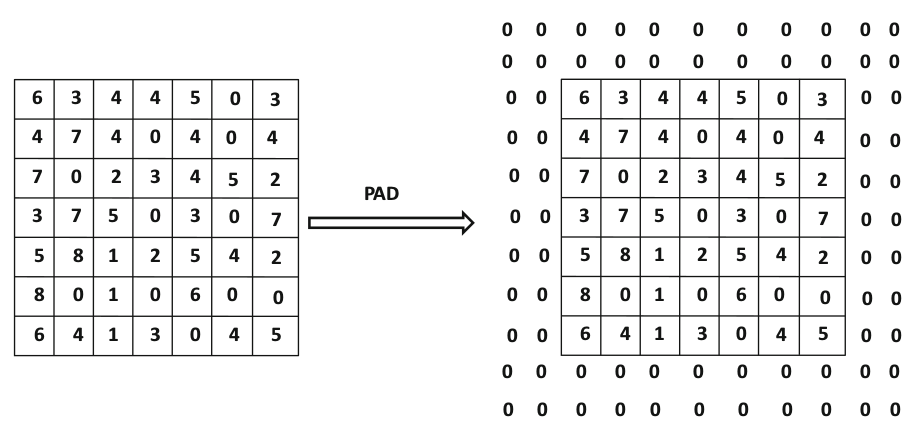

In [66]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/padding.png",width=700, height=500)

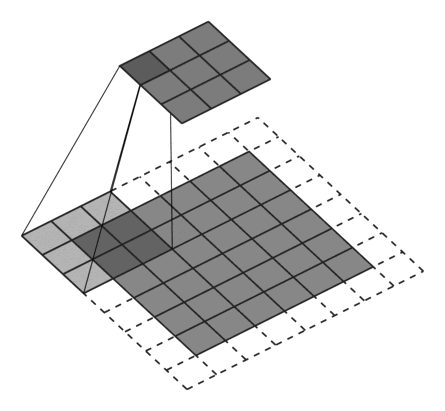

In [68]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/convwpad.png",width=400, height=400)

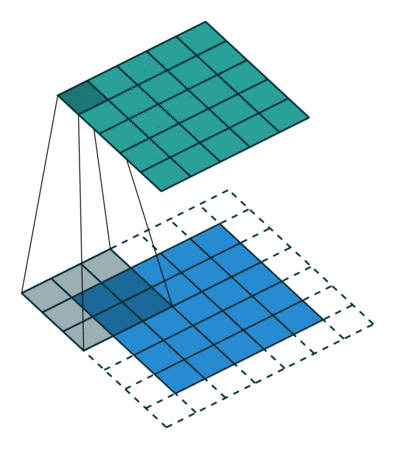

In [72]:
from IPython.display import Image;
Image("./images/same_padding_no_strides.gif")

Look for *half padding*, *valid padding*, and *full padding*.

### Stride

There are other ways in which convolution can reduce the spatial footprint of the image. It is not necessary to perform the convolution at every spatial position in the layer. One can reduce the level of granularity of the convolution by using the notion of strides. When a stride of $S_q$ is used in the $q$th layer, the convolution is performed at the locations 1, $S_q+1$, $2S_q+1$, and so on along both spatial dimensions of the layer. The spatial size of the output on performing this convolution has height of $(H_q - K_q)/S_q + 1$ and a width of $(W_q - K_q)/S_q + 1$. \\
It is most common to use a stride of 1, although a stride of 2 is occasionally used as well. It is rare to use strides more than 2 in normal circumstances. Even though a stride of 4 was used in the input layer of the winning architecture of the ILSVRC (ImageNet Large Scale Visual Recognition Challenge) competition of 2012, the winning entry in the subsequent year reduced the stride to 2 to improve accuracy. Larger strides can be helpful in memory-constrained settings or to reduce overfitting if the spatial resolution is unnecessarily high. Strides have the effect of rapidly increasing the receptive field of each feature in the hidden layer, while reducing the spatial footprint of the entire layer.

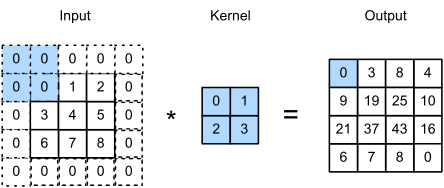

In [80]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/stride.png",width=400, height=400)

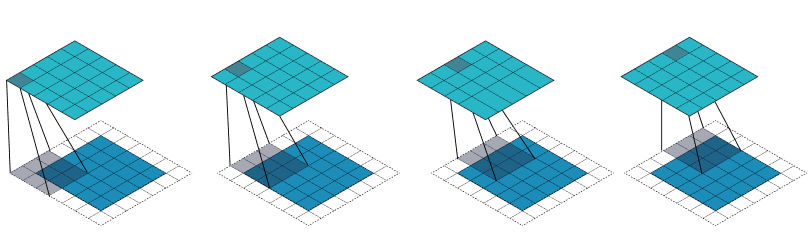

In [82]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/stride2.png",width=900, height=900)

### The ReLU Layer

- **Nonlinear Activation Functions**:
  - Preferred in neural networks as they allow nodes to learn more complex structures in the data.
  - Two widely used nonlinear activation functions are:
    - **Sigmoid Activation Function**:
      - Transforms input into values between 0.0 and 1.0.
      - Popular until the early 1990s.
      - Suffers from saturation, where large values snap to 1.0 and small values snap to 0.0.
    - **Hyperbolic Tangent (tanh) Activation Function**:
      - Similar to sigmoid, but outputs values between -1.0 and 1.0.
      - Preferred over sigmoid in the late 1990s and 2000s due to easier training and better performance.
      - Also suffers from saturation and limited sensitivity.
  
- **ReLU Activation Function**:
  - Applied interleaved with the convolution and pooling operations in CNNs.
  - Element-wise operation applied per pixel in a layer.
  - Replaces all negative pixel values in the feature map by zero.
  - Introduces non-linearity to increase the model's ability to capture non-linear features in images.
  - Helps overcome the linearity of convolution operations and accounts for non-linearities in real-world data.

### Fully Connected Layers and Classification

- **Fully Connected Layers**:
  - Each feature in the final spatial layer is connected to each hidden state in the first fully connected layer.
  - Functions similarly to a traditional feed-forward network.
  - More than one fully connected layer may be used to increase computational power towards the end.
  - Connections among these layers are structured like traditional feed-forward networks.
  - Vast majority of parameters lie in the fully connected layers.
  - Example: If each of two fully connected layers has 4096 hidden units, the connections between them have more than 16 million weights.

- **Output Layer**:
  - Application-specific design, such as classification.
  - Fully connected to every neuron in the penultimate layer.
  - Activation function (e.g., logistic, softmax, linear) chosen based on the application nature.

- **Flattening the Final Feature Map**:
  - Transforming image $W \times H \times D$ matrix into $1 \times (W \times H \times D)$ array.
  - First fully connected layer has $W \times H \times D$ neurons.
  - Example: For handwritten digit classification with final convolution layer generating 10 feature maps of size $7\times7$, first fully connected layer has 490 neurons, and output layer has 10 neurons for classifying digits 0 to 9.

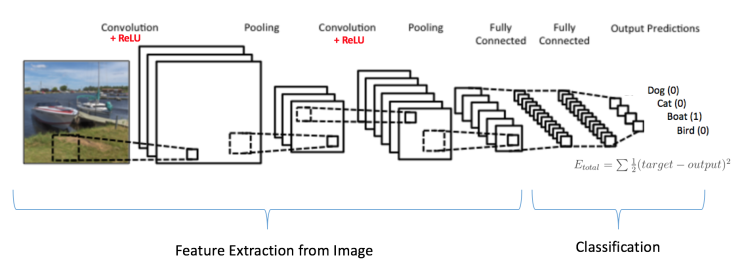

In [89]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/fullyc.png",width=900, height=900)

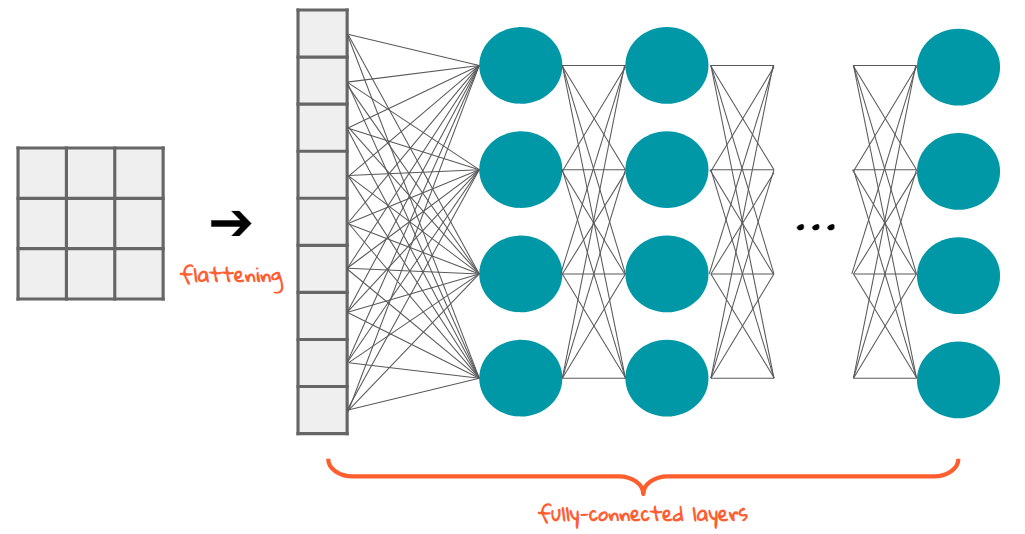

In [93]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/flattening.png",width=500, height=500)

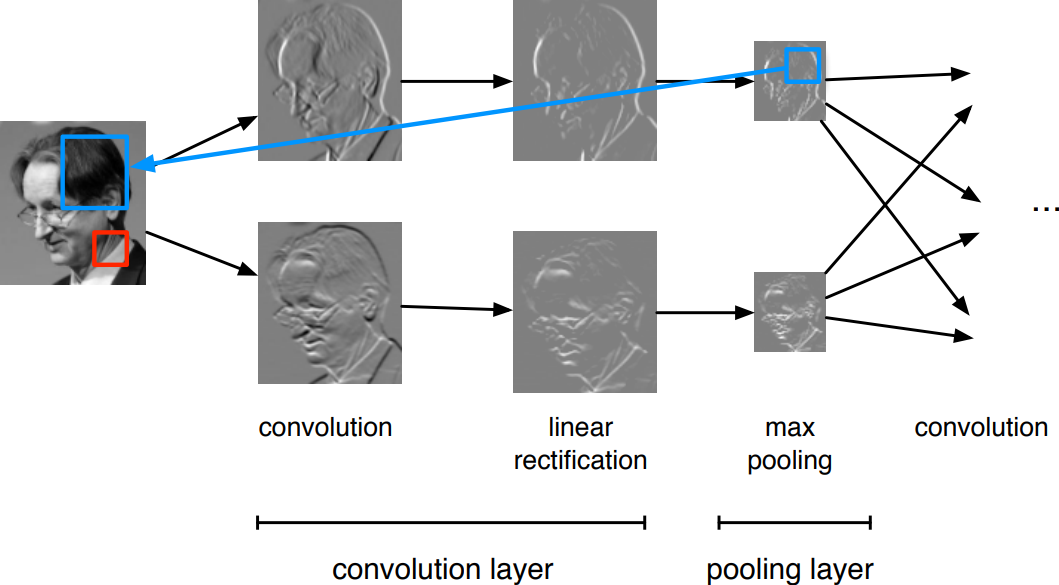

In [95]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/convnet-geoff.png",width=700, height=500)

## Dropout

Dropout provides us that a computationally inexpensive but powerful method of regularizing a broad family of models. To a first approximation, dropout can be thought of as a method of making bagging practical for ensembles of very many large neural networks. Bagging involves training multiple models, and evaulating multiple models on each test example. This seems impractical when each model is a large neural network, since training and evaulating such networks costly in terms of runtime and memory. It is common to use ensembles of five to ten neural networks but more than this rapidly becomes unwidely. Dropout provides an inexpensive approximation to training and evaulating a bagged ensemble of exponentially many neural netwoks.\\
Specifically, dropout trains the ensemble consisting of all sub-networks that
can be formed by removing non-output units from an underlying base network. In most modern neural networks, based on a series ofaffine transformations and nonlinearities, we can effectively remove a unit from a network by multiplying its output value by zero. 

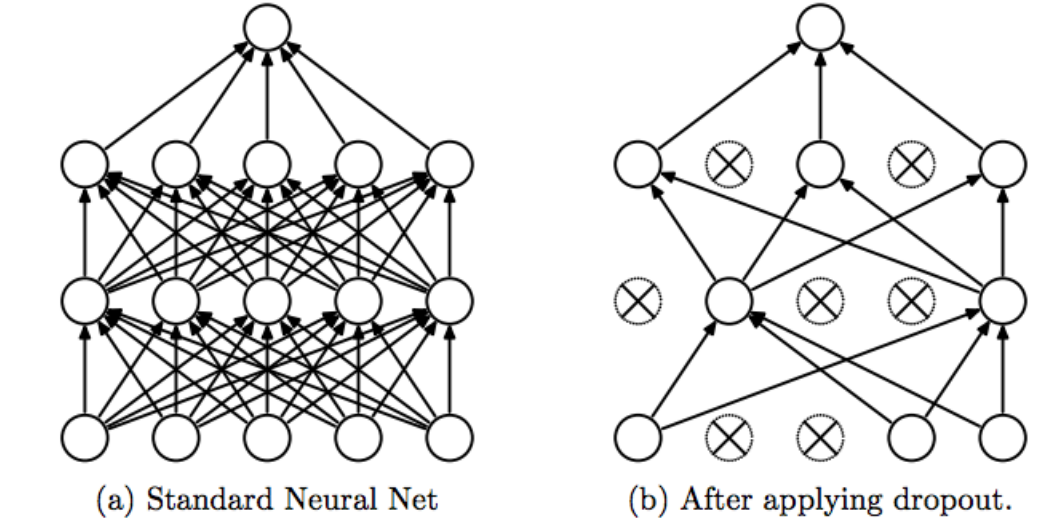

In [98]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/dropout.png",width=700, height=500)

## Batch Normalization
Batch normalization is a recent method to address the vanishing and exploding gradient problems, which cause activation gradients in
successive layers to either reduce or increase in magnitude. Another very imprortant problem in training a deep learning model is that of internal covariate shift. The problem is that the parameters change during training, and therefore the hidden variable activations change as well. In other words, the hidden inputs from early layers to later layers keep changing. Changing inputs from early layers to later layers causes slower convergence during training because the training data for later layers is not stable. Batch Normalization reduces this effect. In Batch Normalization, the idea is to add additional "normalization layers" between hidden layers that resist this type of behavior by creating features with somewhat similiar variance. We normalize the input layer by adjusting and scaling the activations. For example, when we have features from 0 to 1 and some from 1 to 1000, we should normalize them to speed up learning. If the input layer is benefiting from it, why not do the same thing also for the values in the hidden layers, that are changing all the time, and get 10 times or more improvement in the training speed.

For more details: [Gradient Calculation For Batch Normalization](https://safakkbilici.github.io/gradient-for-bn/)

## Implementation Details

Due to convolutions, paddings, strides and poolings; the size of the image is always changing in layers. We had showed the changing the size of the image, now we try to do some formulation.

### Convolution Layer
An image accepts a volume of size $W_1 \times H_1 \times D_1$:

$\rightarrow$ Required Hyperparameters:
- Number of Kernels $K$
- Kernel's Spatial Extent $F$
- Stride $S$
- Amount of Zero Padding $P$

$\rightarrow$ Produces A Volume of Size $W_2 \times H_2 \times D_2$:

- $W_2 = (W_1 - F + 2P)/S +1$
- $H_2 = (H_1 - F + 2P)/S +1$
- $D_2 = K$

### Pooling Layer
$\rightarrow$ Required Hyperparameters:

- Kernel's Spatial Extent $F$
- Stride $S$

$\rightarrow$ Produces A Volume of Size $W_2 \times H_2 \times D_2$:

- $W_2 = (W_1 - F)/S$
- $H_2 = (H_1 - F)/S$
- $D_2 = D_1$

$\rightarrow$ If No Overlapping:

- $W_2 = W_1/F$
- $H_2 = H_1/F$
- $D_2 = D_1$

## Lab.

In [108]:
#!pip3 install torch torchvision

In [110]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [112]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        # grayscale has 1 channel + 8 filters + 3x3 filter
        # same padding = (filter size - 1)/2 -> (3 -1)/2 = 1 
        # same padding -> input size = output size
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        # output size of each feature map = 
        # ((input size - filter size + 2(padding))/(stride) + 1) -> (28 - 3 + 2)/1 + 1 = 28
        self.batch_norm1 = nn.BatchNorm2d(8) # feature map = 8
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size = 2)
        # the output size will be = 28/2 = 14
        # same padding= (filter size - 1)/2 -> (5-1)/2 = 2
        self.cnn2 = nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)
        # output size of each feature map = 
        # ((input size - filter size + 2(padding))/(stride) + 1) -> (14 - 5 + 2*2)/1 + 1 = 14
        self.batch_norm2 = nn.BatchNorm2d(32)
        """there are a maxpooling again filter size = 2x2"""
        """so output size is now 14/2 = 7 """
        # 32 feature map flatten (output size = 7x7):
        # 7*7*32 = 1568
        self.fc1 = nn.Linear(1568,600)
        self.dropout = nn.Dropout(p = 0.5)
        self.fc2 = nn.Linear(600,10)
        self.softmax = nn.Sigmoid()
    
    def forward(self,x):
        out = self.cnn1(x)
        out2 = out.clone().detach()
        out = self.batch_norm1(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.cnn2(out)
        out3 = out.clone().detach()
        out = self.batch_norm2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        # flattening:
        out = out.view(-1,1568) #(batch_size,1568) == (100,1568) == (-1,1568) -1 is flexible
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        #out = self.softmax(out)
        return out,out2, out3

In [122]:
mean = 0.1307
std = 0.3081
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((mean,),(std,))])

# training_dataset = datasets.MNIST(root='/media/safak/Data/Desktop HDD/Deep Learning/PyTorch/CNN',
#                                train = True,transform = transform, download = True)
# test_dataset = datasets.MNIST(root='/media/safak/Data/Desktop HDD/Deep Learning/PyTorch/CNN',
#                                train = False,transform = transform)
training_dataset = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = transform, 
    download = True,            
)
testing_dataset = datasets.MNIST(
    root = 'data', 
    train = False, 
     transform = transform
)


tensor(0)


/opt/anaconda3/lib/python3.11/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/opt/anaconda3/lib/python3.11/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


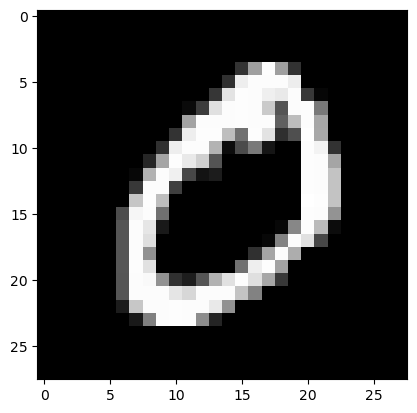

In [124]:
random_img = training_dataset.train_data[1].numpy() * std + mean
plt.imshow(random_img.reshape(28,28),cmap='gray')
print(training_dataset.train_labels[1])

In [126]:
def showData(col,row,train):
    fig = plt.figure(figsize=(15,15))
    plt.title('Random Images From Train Dataset',loc='left')
    #plt.rcParams['axex.titlepad'] = 10
    for i in range(1,col*row + 1):
        rand_label = np.random.randint(len(train.train_data))
        img = train.train_data[rand_label]
        fig.add_subplot(row,col,i)
        fig.set_figheight(7)
        fig.set_figwidth(9)
        plt.axis('off')
        plt.imshow(img, cmap='gray')
    plt.show()

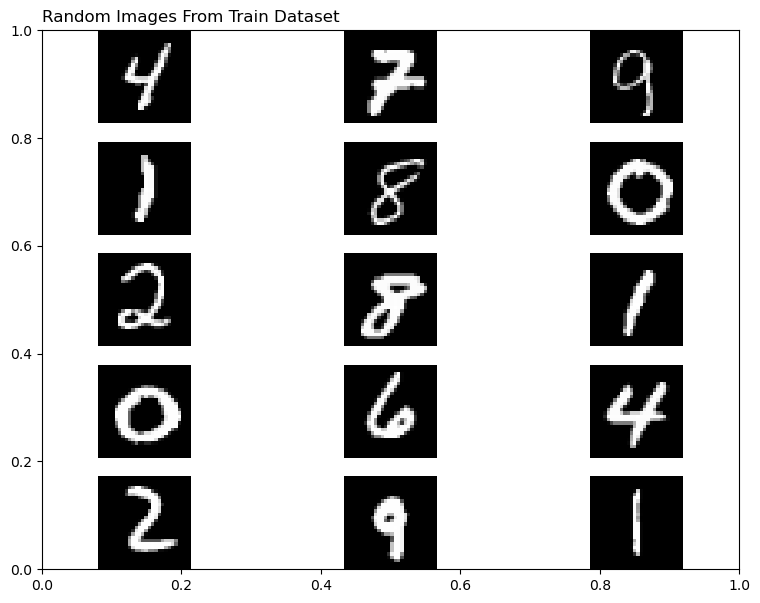

In [128]:
showData(3,5,training_dataset)

In [134]:
batch_size = 100
train_load = torch.utils.data.DataLoader(dataset = training_dataset,
                                             batch_size = batch_size,
                                             shuffle = True)
test_load = torch.utils.data.DataLoader(dataset = testing_dataset,
                                              batch_size = batch_size,
                                              shuffle = True)
print(len(training_dataset))
print(len(train_load))
print(len(testing_dataset))
print(len(test_load))

60000
600
10000
100


In [136]:
model = CNN()
CUDA = torch.cuda.is_available()
if CUDA:
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)
print(CUDA)

False


In [140]:
epochs = 10
training_loss = []
training_accuracy= []
test_loss = []
test_accuracy = []

for epoch in range(epochs):
    correct = 0
    iterations = 0
    each_loss = 0.0

    model.train()
    for i,(inputs, targets) in enumerate(train_load):
        if CUDA: 
            inputs = inputs.cuda()
            targets = targets.cuda()
        outputs, _, o3 = model.forward(inputs)
        loss = criterion(outputs, targets)
        each_loss+=loss.item() # extract the value from tensor

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted=torch.max(outputs,1)
        correct += (predicted == targets).sum().item()
        iterations += 1
    training_loss.append(each_loss/iterations)
    training_accuracy.append(100 * correct/len(training_dataset))

    #now we test:
    each_loss_test = 0.0
    iterations = 0 
    correct = 0
    model.eval()
    for i,(inputs, targets) in enumerate(test_load):
        if CUDA: 
            inputs = inputs.cuda()
            targets = targets.cuda()
        outputs, _, o3= model.forward(inputs)
        loss = criterion(outputs, targets)
        each_loss_test+=loss.item() # extract the value from tensor

        _, predicted=torch.max(outputs,1)
        correct += (predicted == targets).sum().item()
        iterations += 1

    test_loss.append(each_loss_test/iterations)
    test_accuracy.append(100 * correct/len(testing_dataset))
    print("Epoch {}/{} - Training Loss: {:.3f} - Training Accuracy: {:.3f} - Test Loss: {:.3f} - Test Accuracy: {:.3f}"
          .format(epoch+1,epochs,training_loss[-1],training_accuracy[-1],test_loss[-1],test_accuracy[-1]))

Epoch 1/10 - Training Loss: 0.203 - Training Accuracy: 93.780 - Test Loss: 0.051 - Test Accuracy: 98.500
Epoch 2/10 - Training Loss: 0.134 - Training Accuracy: 96.110 - Test Loss: 0.045 - Test Accuracy: 98.650
Epoch 3/10 - Training Loss: 0.106 - Training Accuracy: 96.995 - Test Loss: 0.046 - Test Accuracy: 98.600
Epoch 4/10 - Training Loss: 0.089 - Training Accuracy: 97.492 - Test Loss: 0.033 - Test Accuracy: 98.990
Epoch 5/10 - Training Loss: 0.079 - Training Accuracy: 97.733 - Test Loss: 0.043 - Test Accuracy: 98.680
Epoch 6/10 - Training Loss: 0.075 - Training Accuracy: 97.862 - Test Loss: 0.033 - Test Accuracy: 99.040
Epoch 7/10 - Training Loss: 0.070 - Training Accuracy: 97.893 - Test Loss: 0.039 - Test Accuracy: 98.910
Epoch 8/10 - Training Loss: 0.061 - Training Accuracy: 98.230 - Test Loss: 0.031 - Test Accuracy: 99.150
Epoch 9/10 - Training Loss: 0.065 - Training Accuracy: 98.125 - Test Loss: 0.047 - Test Accuracy: 98.600
Epoch 10/10 - Training Loss: 0.060 - Training Accuracy:

Text(0, 0.5, 'Accuracy')

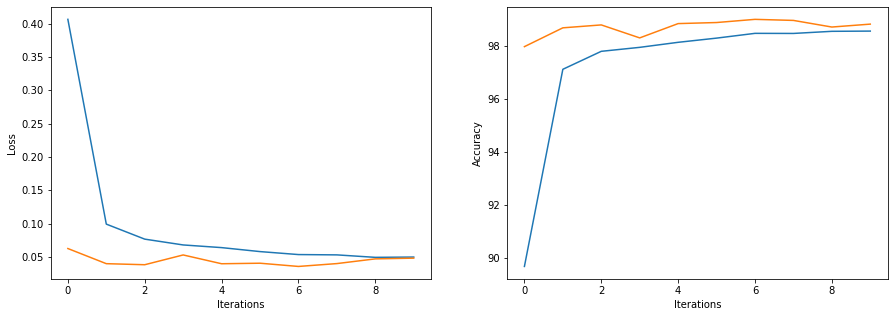

In [45]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(training_loss,label = 'Train Loss');
axs[0].plot(test_loss,label='Test Loss');
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Loss')
axs[1].plot(training_accuracy,label = 'Train Accuracy');
axs[1].plot(test_accuracy,label='Test Accuracy');
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Accuracy')

torch.Size([1, 1, 28, 28])
Predicted: 9
Real Value: 9


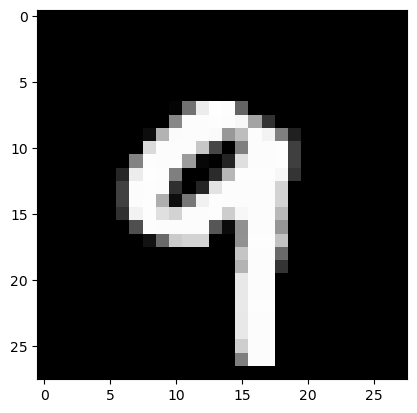

In [152]:
rand_label = np.random.randint(len(testing_dataset))
img = testing_dataset[rand_label][0].resize_((1,1,28,28))
imgshow = img.clone().detach()
plt.imshow(imgshow.resize_((28,28)).numpy(),cmap='gray')
label = testing_dataset[rand_label][1]
model.eval()
if CUDA:
    model = model.cuda()
    label = label.cuda()
    img = img.cuda()
print(img.shape)
out,out2,out3 = model.forward(img)

_,predicted = torch.max(out,1)
print("Predicted:",predicted.item())
print("Real Value:",label)

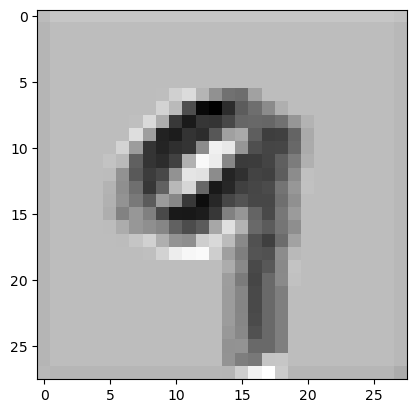

In [154]:
a = out2[:,0,:,:].reshape(28,28)
a = a.cpu()
plt.imshow(a,cmap='gray')

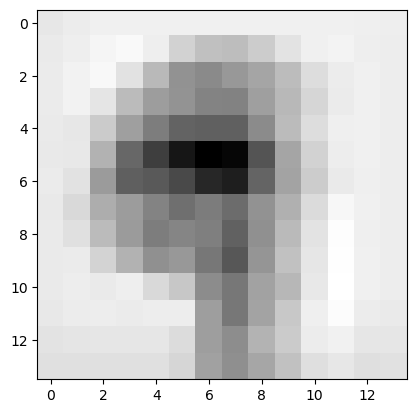

In [156]:
a = out3[:,0,:,:].reshape(14,14)
a = a.cpu()
plt.imshow(a,cmap='gray')

In [191]:
out.data

tensor([[-24.1222, -10.1721, -17.7488, -10.9059,   9.3929, -14.5813, -34.6649,
          13.6021, -17.4082,  33.7851]])

The number is:  3


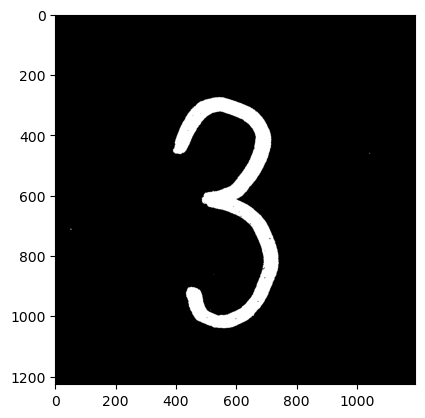

In [201]:
import cv2 
from PIL import Image
transforms_photo = transforms.Compose([transforms.Resize((28,28)),
                                 transforms.ToTensor(),
                                 transforms.Normalize((mean,),(std,))])
def predict_yours(img_name: str, model):
    img = cv2.imread(img_name,0)
    #ret, threshold = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    ret3,threshold = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img = 255 - threshold
    plt.imshow(img,cmap='gray')
    img = Image.fromarray(img)
    img = transforms_photo(img)
    img = img.view((1,1,28,28))

    model.eval()
    if CUDA:
        model = model.cuda()
        img = img.cuda()
    out,_,_ = model.forward(img)
    # print(f' out type is: {type(out)}')
    # print(f'the data is: {out.data}')
    _, predd = torch.max(out,1)
    return predd.item()
pred = predict_yours('./images/3.jpg', model)
print("The number is: ",pred)

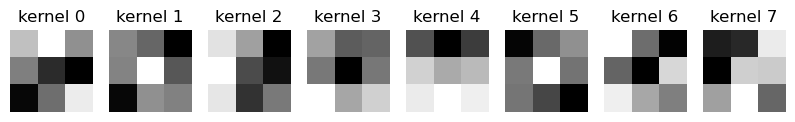

In [203]:
def showKernels(kernel_tensor, num_cols = 6, figsize=(10,10)):
    nkernels = kernel_tensor.shape[0]
    num_rows =  1 + nkernels//num_cols
    fig = plt.figure(figsize=figsize)
    for kernel in range(0,nkernels):
        ax1 = fig.add_subplot(num_rows,num_cols,kernel+1)
        ax1.imshow(kernel_tensor[kernel][0,:,:], cmap='gray')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_title('kernel {}'.format(kernel))
    plt.show()


filters = model.modules();
model_layers = [i for i in model.children()]
conv1 = model_layers[0]
conv2 = model_layers[4]
conv1_kernels = conv1.cpu().weight.data.numpy()
conv2_kernels = conv2.cpu().weight.data.numpy()
showKernels(conv1_kernels,8)

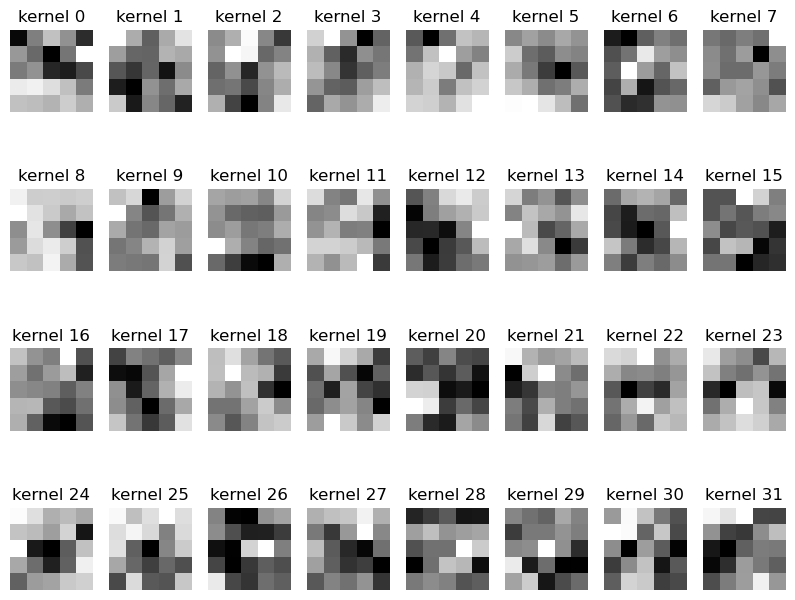

In [205]:
showKernels(conv2_kernels,8)

[How convolutional neural networks see the world](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html)

# History Of Computer Vision
## LeNet5 LeCun et al, 1998

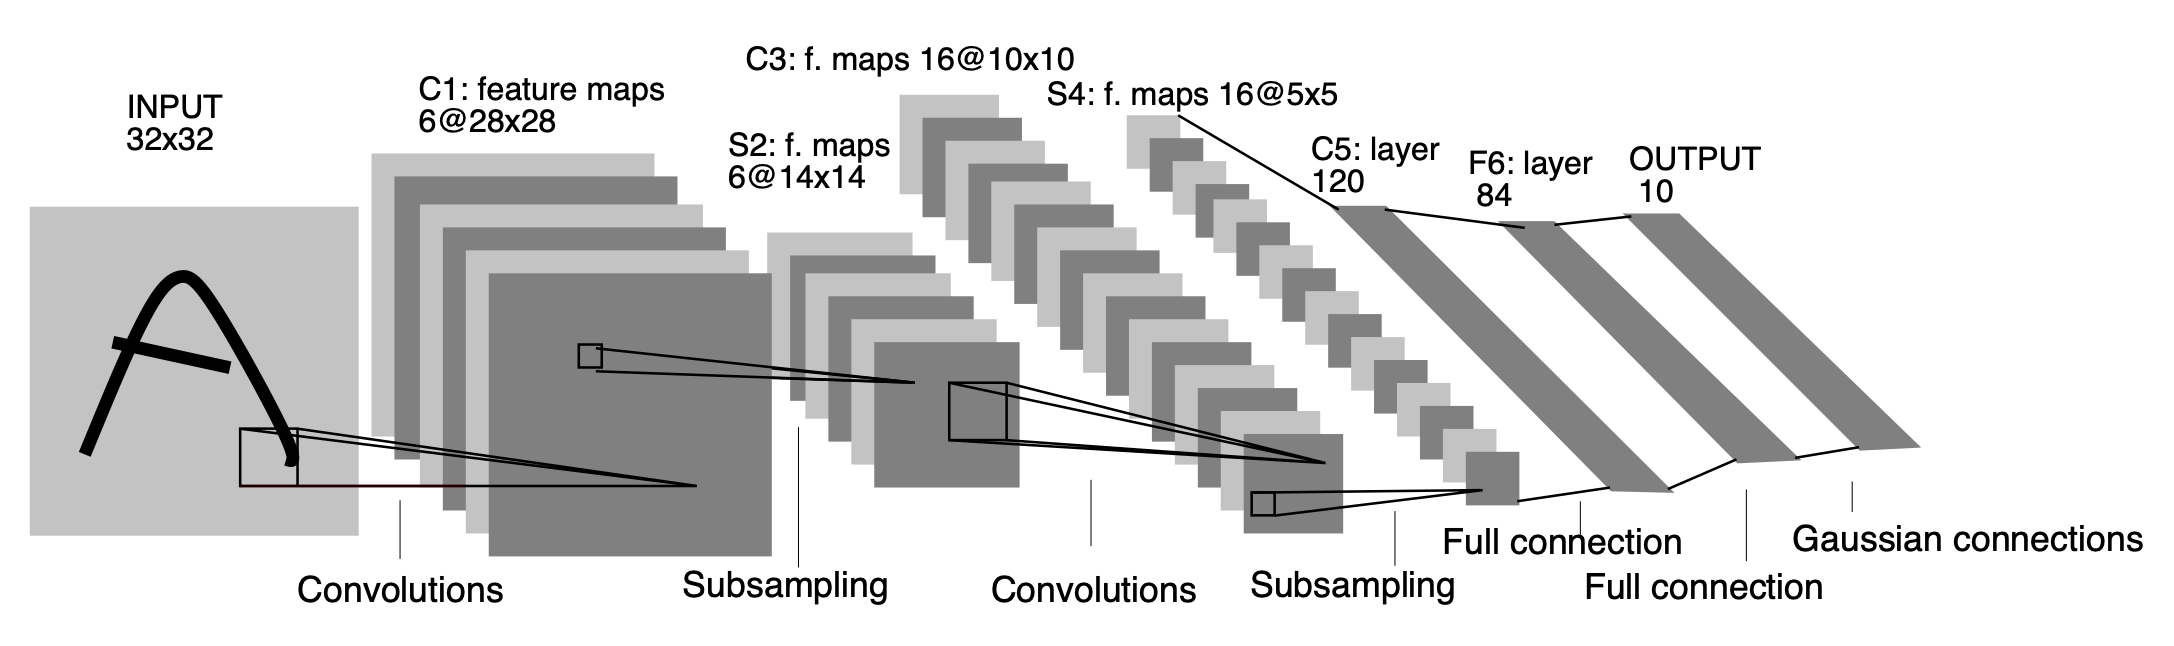

In [210]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/lenet5.png",width=900, height=900)

    ----------------------------------------------------------------
            Layer (type)               Output Shape         Param #
    ================================================================
                Conv2d-1            [-1, 6, 28, 28]             156
                  ReLU-2            [-1, 6, 28, 28]               0
             MaxPool2d-3            [-1, 6, 14, 14]               0
                Conv2d-4           [-1, 16, 10, 10]           2,416
                  ReLU-5           [-1, 16, 10, 10]               0
             MaxPool2d-6             [-1, 16, 5, 5]               0
                Conv2d-7            [-1, 120, 1, 1]          48,120
                  ReLU-8            [-1, 120, 1, 1]               0
                Linear-9                   [-1, 84]          10,164
                 ReLU-10                   [-1, 84]               0
               Linear-11                   [-1, 10]             850
           LogSoftmax-12                   [-1, 10]               0
    ================================================================
    Total params: 61,706                                            
    Trainable params: 61,706                                        
    Non-trainable params: 0                                         
    ----------------------------------------------------------------
    Input size (MB): 0.00                                           
    Forward/backward pass size (MB): 0.11                           
    Params size (MB): 0.24                                          
    Estimated Total Size (MB): 0.35                                 
    ----------------------------------------------------------------

## AlexNet (Krizhevsky et al, 2012)

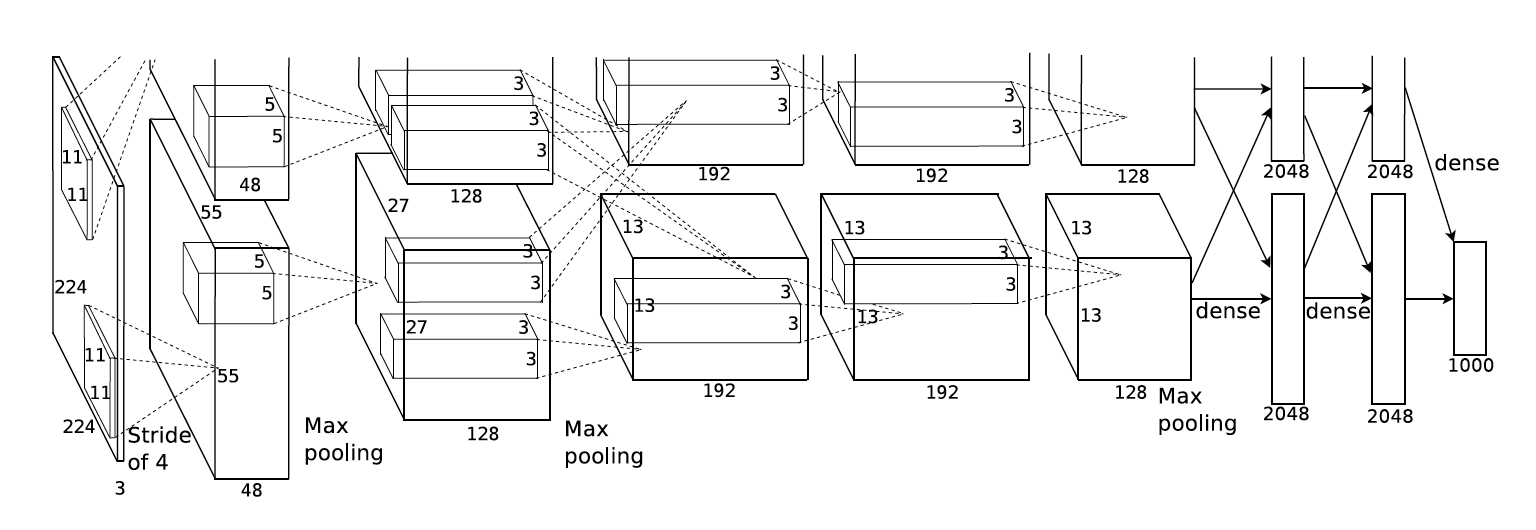

In [214]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/alexnet.png",width=900, height=900)

    ----------------------------------------------------------------
            Layer (type)               Output Shape         Param #
    ================================================================
                Conv2d-1           [-1, 64, 55, 55]          23,296
                  ReLU-2           [-1, 64, 55, 55]               0
             MaxPool2d-3           [-1, 64, 27, 27]               0
                Conv2d-4          [-1, 192, 27, 27]         307,392
                  ReLU-5          [-1, 192, 27, 27]               0
             MaxPool2d-6          [-1, 192, 13, 13]               0
                Conv2d-7          [-1, 384, 13, 13]         663,936
                  ReLU-8          [-1, 384, 13, 13]               0
                Conv2d-9          [-1, 256, 13, 13]         884,992
                 ReLU-10          [-1, 256, 13, 13]               0
               Conv2d-11          [-1, 256, 13, 13]         590,080
                 ReLU-12          [-1, 256, 13, 13]               0
            MaxPool2d-13            [-1, 256, 6, 6]               0
              Dropout-14                 [-1, 9216]               0
               Linear-15                 [-1, 4096]      37,752,832
                 ReLU-16                 [-1, 4096]               0
              Dropout-17                 [-1, 4096]               0
               Linear-18                 [-1, 4096]      16,781,312
                 ReLU-19                 [-1, 4096]               0
               Linear-20                 [-1, 1000]       4,097,000
    ================================================================
    Total params: 61,100,840                                        
    Trainable params: 61,100,840                                    
    Non-trainable params: 0                                         
    ----------------------------------------------------------------
    Input size (MB): 0.57                                           
    Forward/backward pass size (MB): 8.31                           
    Params size (MB): 233.08                                        
    Estimated Total Size (MB): 241.96                               
    ----------------------------------------------------------------

## AlexNet vs LeNet5

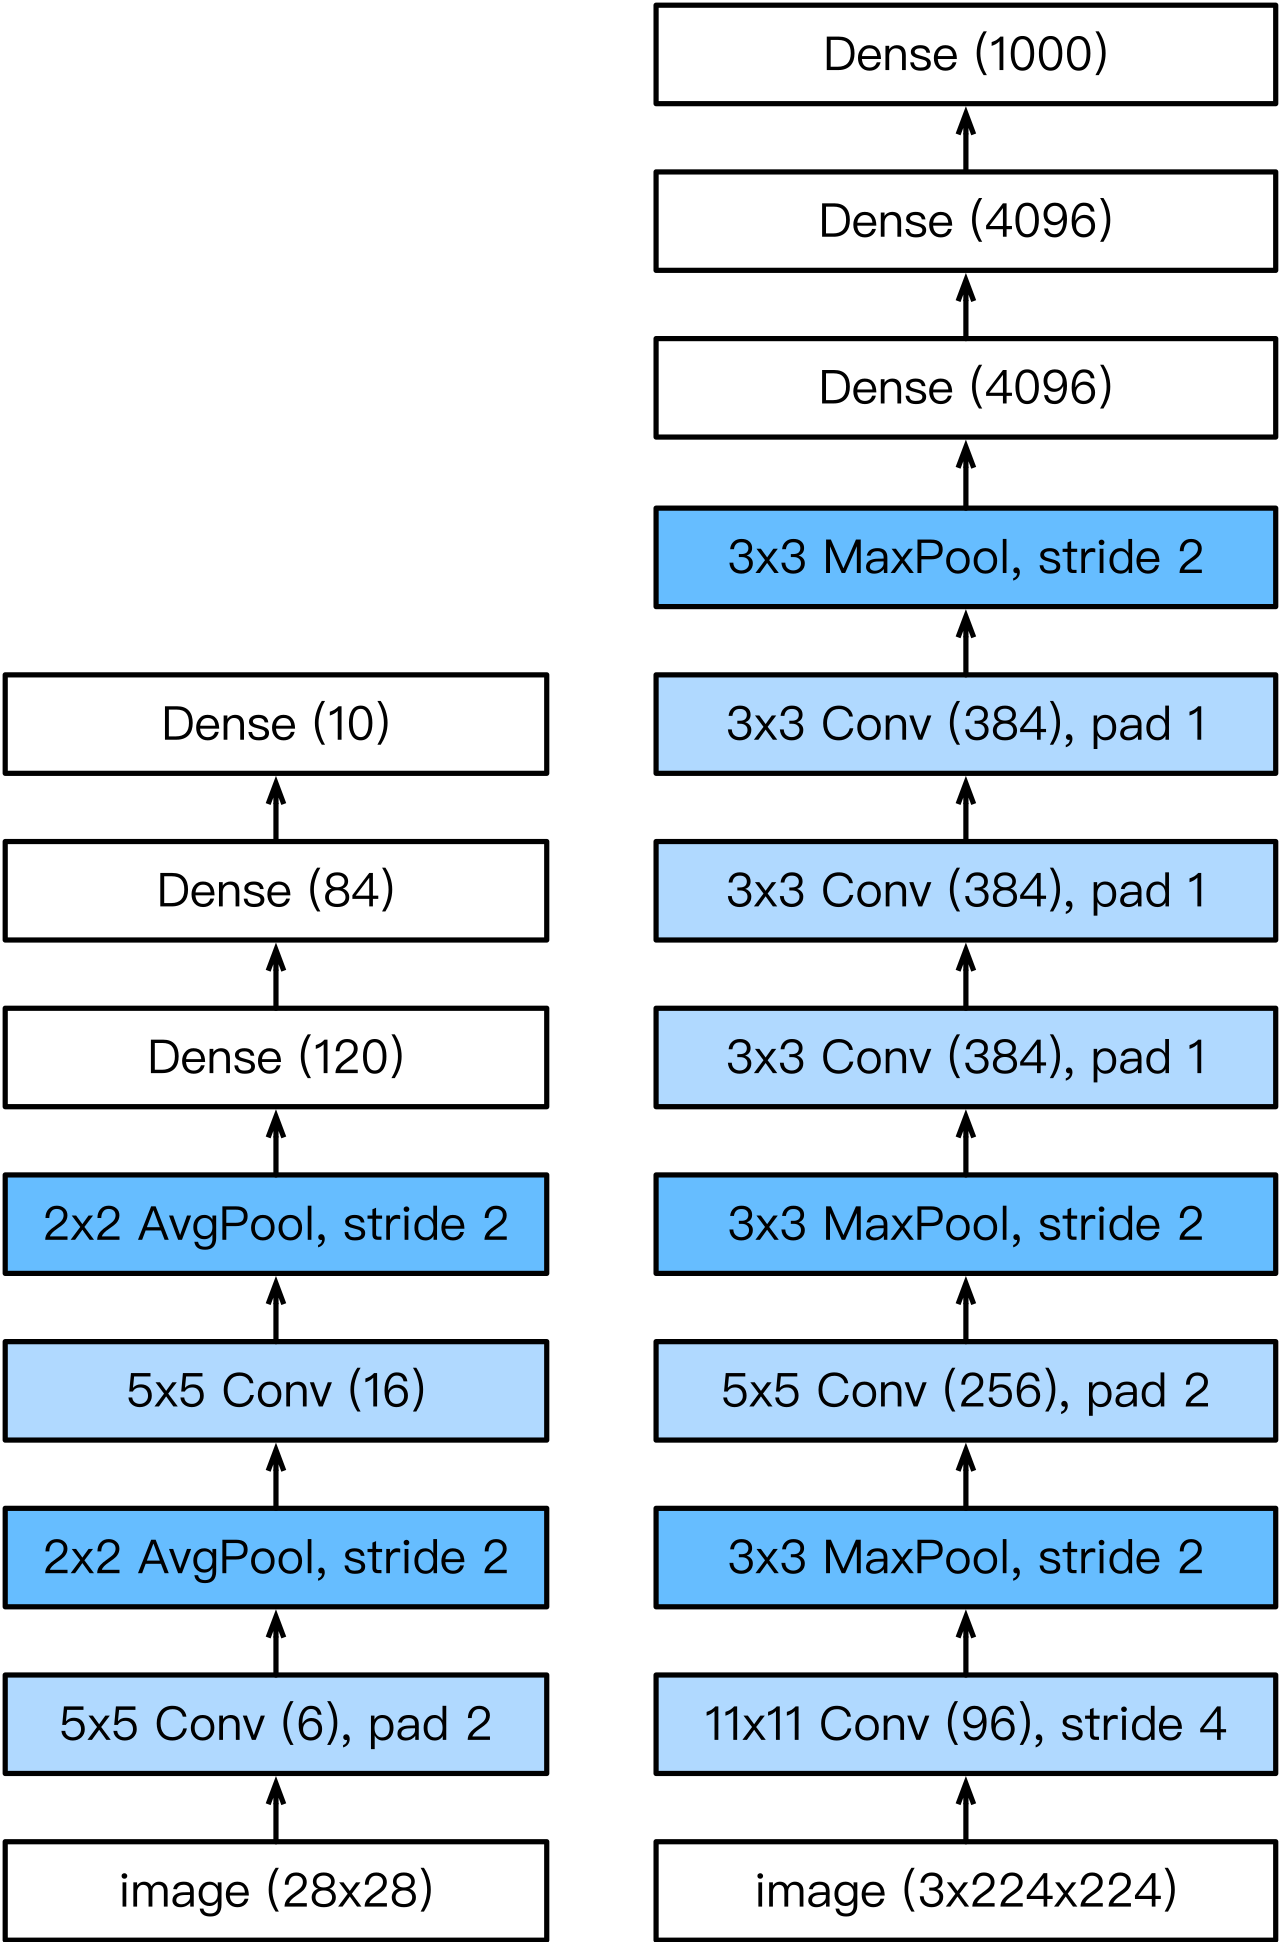

In [222]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/alexnetvslenet.png",width=400, height=400)


## VGG (Simonyan and Zisserman, 2014)

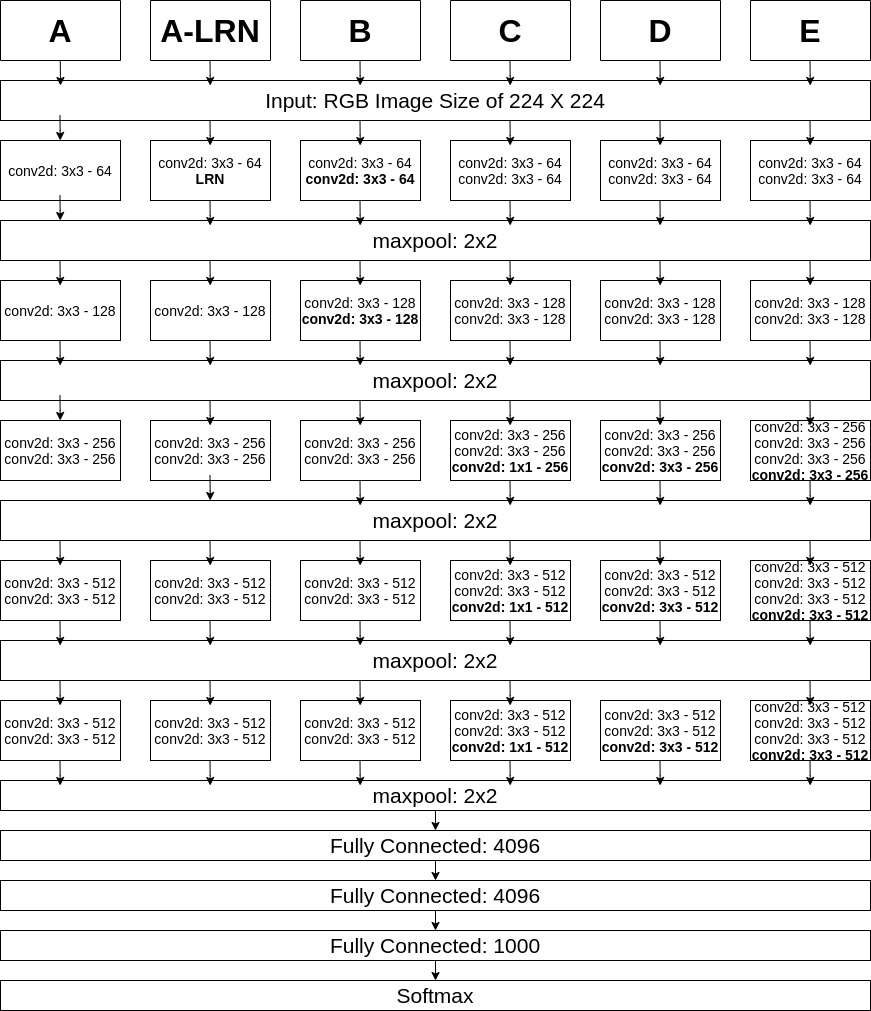

In [227]:
from IPython.display import Image
from IPython.core.display import HTML
Image(filename= "./images/vgg2.png",width=800, height=800)

    ----------------------------------------------------------------
            Layer (type)               Output Shape         Param #
    ================================================================
                Conv2d-1         [-1, 64, 224, 224]           1,792
                  ReLU-2         [-1, 64, 224, 224]               0
                Conv2d-3         [-1, 64, 224, 224]          36,928
                  ReLU-4         [-1, 64, 224, 224]               0
             MaxPool2d-5         [-1, 64, 112, 112]               0
                Conv2d-6        [-1, 128, 112, 112]          73,856
                  ReLU-7        [-1, 128, 112, 112]               0
                Conv2d-8        [-1, 128, 112, 112]         147,584
                  ReLU-9        [-1, 128, 112, 112]               0
            MaxPool2d-10          [-1, 128, 56, 56]               0
               Conv2d-11          [-1, 256, 56, 56]         295,168
                 ReLU-12          [-1, 256, 56, 56]               0
               Conv2d-13          [-1, 256, 56, 56]         590,080
                 ReLU-14          [-1, 256, 56, 56]               0
               Conv2d-15          [-1, 256, 56, 56]         590,080
                 ReLU-16          [-1, 256, 56, 56]               0
            MaxPool2d-17          [-1, 256, 28, 28]               0
               Conv2d-18          [-1, 512, 28, 28]       1,180,160
                 ReLU-19          [-1, 512, 28, 28]               0
               Conv2d-20          [-1, 512, 28, 28]       2,359,808
                 ReLU-21          [-1, 512, 28, 28]               0
               Conv2d-22          [-1, 512, 28, 28]       2,359,808
                 ReLU-23          [-1, 512, 28, 28]               0
            MaxPool2d-24          [-1, 512, 14, 14]               0
               Conv2d-25          [-1, 512, 14, 14]       2,359,808
                 ReLU-26          [-1, 512, 14, 14]               0
               Conv2d-27          [-1, 512, 14, 14]       2,359,808
                 ReLU-28          [-1, 512, 14, 14]               0
               Conv2d-29          [-1, 512, 14, 14]       2,359,808
                 ReLU-30          [-1, 512, 14, 14]               0
            MaxPool2d-31            [-1, 512, 7, 7]               0
               Linear-32                 [-1, 4096]     102,764,544
                 ReLU-33                 [-1, 4096]               0
              Dropout-34                 [-1, 4096]               0
               Linear-35                 [-1, 4096]      16,781,312
                 ReLU-36                 [-1, 4096]               0
              Dropout-37                 [-1, 4096]               0
               Linear-38                 [-1, 1000]       4,097,000
    ================================================================
    Total params: 138,357,544                                       
    Trainable params: 138,357,544                                   
    Non-trainable params: 0                                         
    ----------------------------------------------------------------
    Input size (MB): 0.57                                           
    Forward/backward pass size (MB): 218.59                         
    Params size (MB): 527.79                                        
    Estimated Total Size (MB): 746.96                               
    ----------------------------------------------------------------
    
    
[Paper Summary: Very Deep Convolutional Networks for Large-Scale Image Recognition](https://safakkbilici.github.io/summary-vggnet/)

## GoogLeNet (Inception v1) (Szegedy et al, 2014)

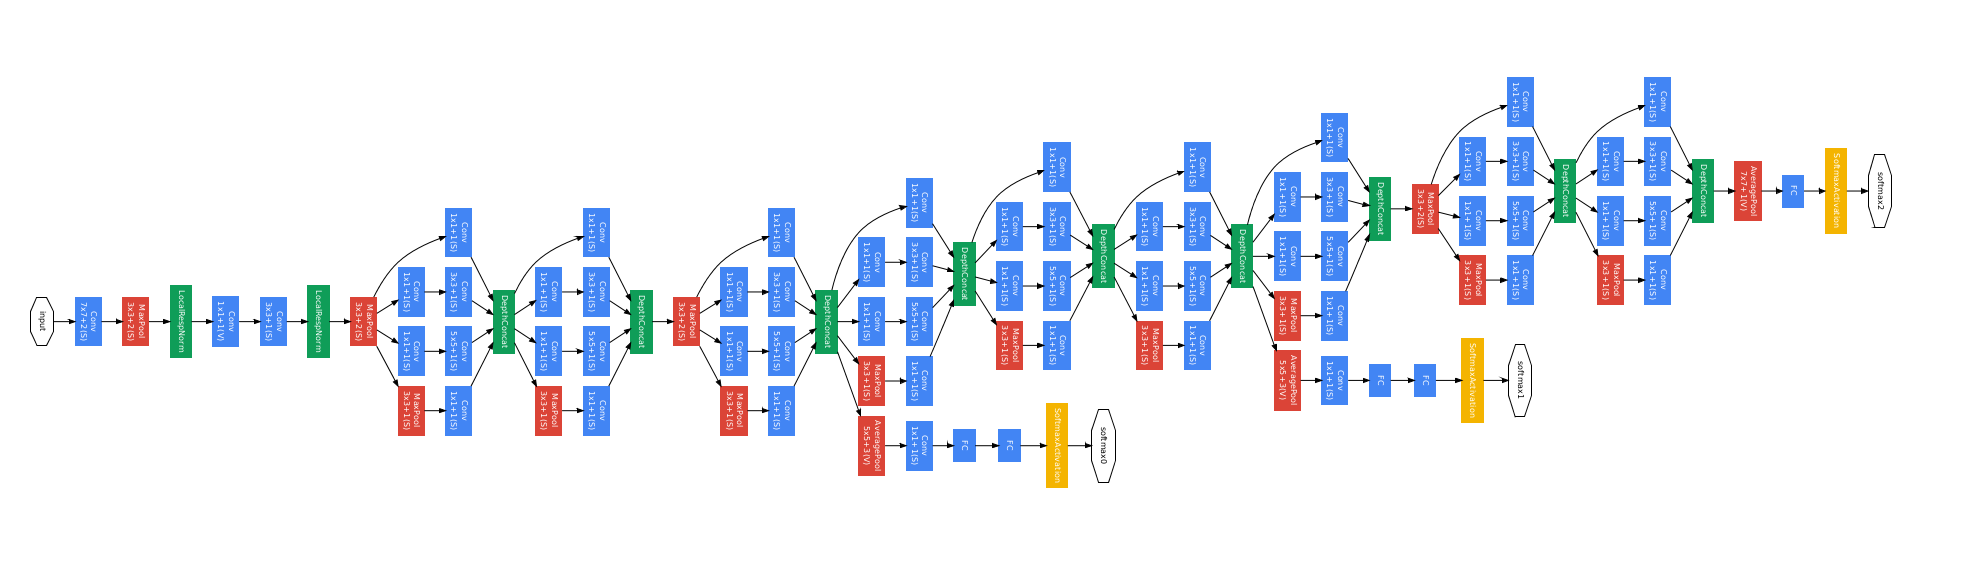

In [233]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/googlenet.png",width=2000, height=800)

An inception block:

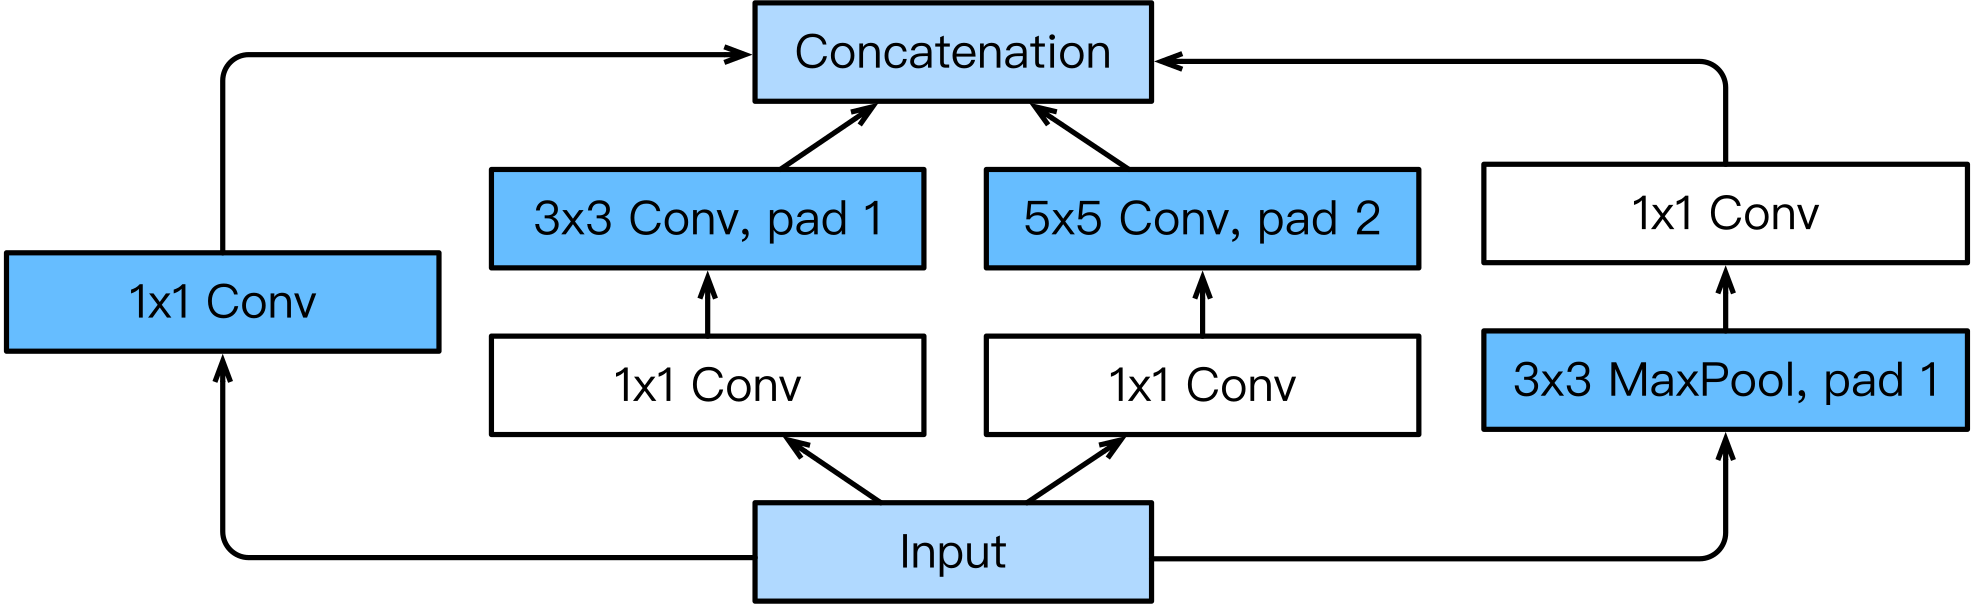

In [235]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/inception.png",width=500, height=500)

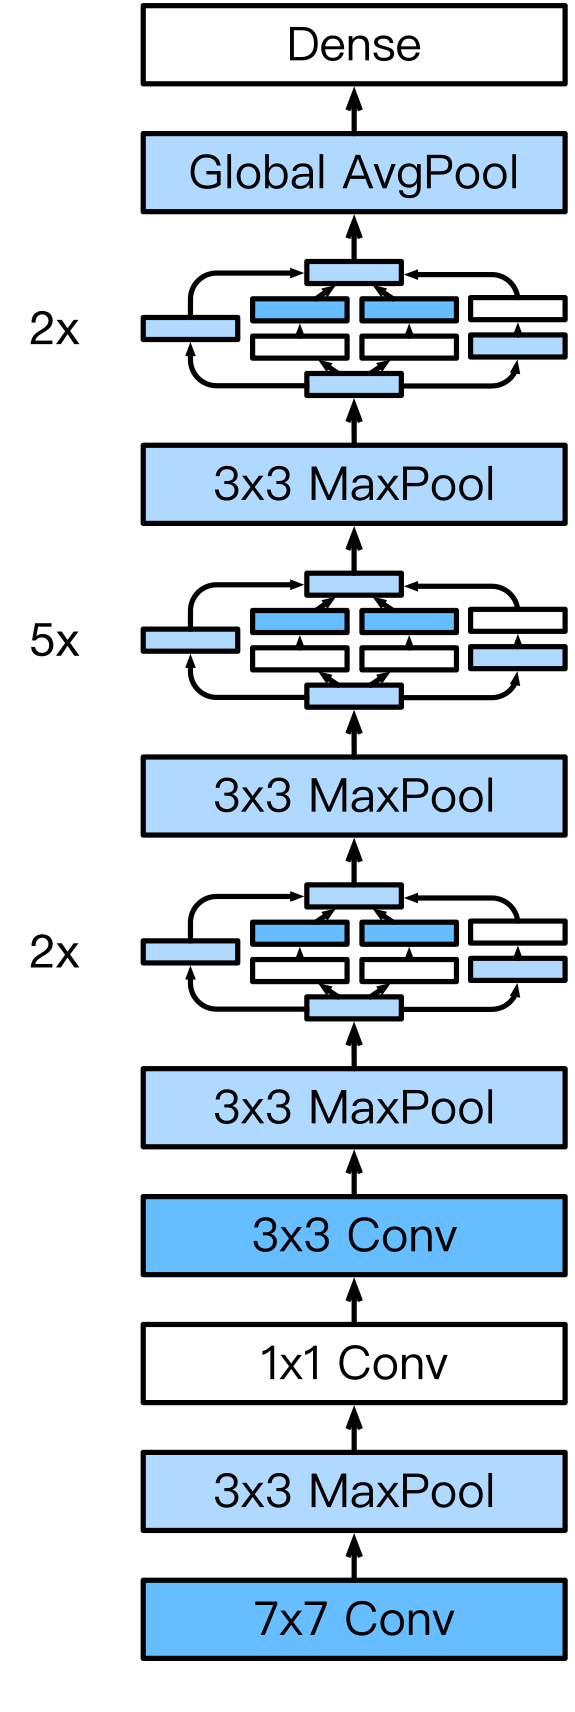

In [239]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/inception-full.png",width=200, height=200)

## ResNet (He et al, 2015)

ResNet block:

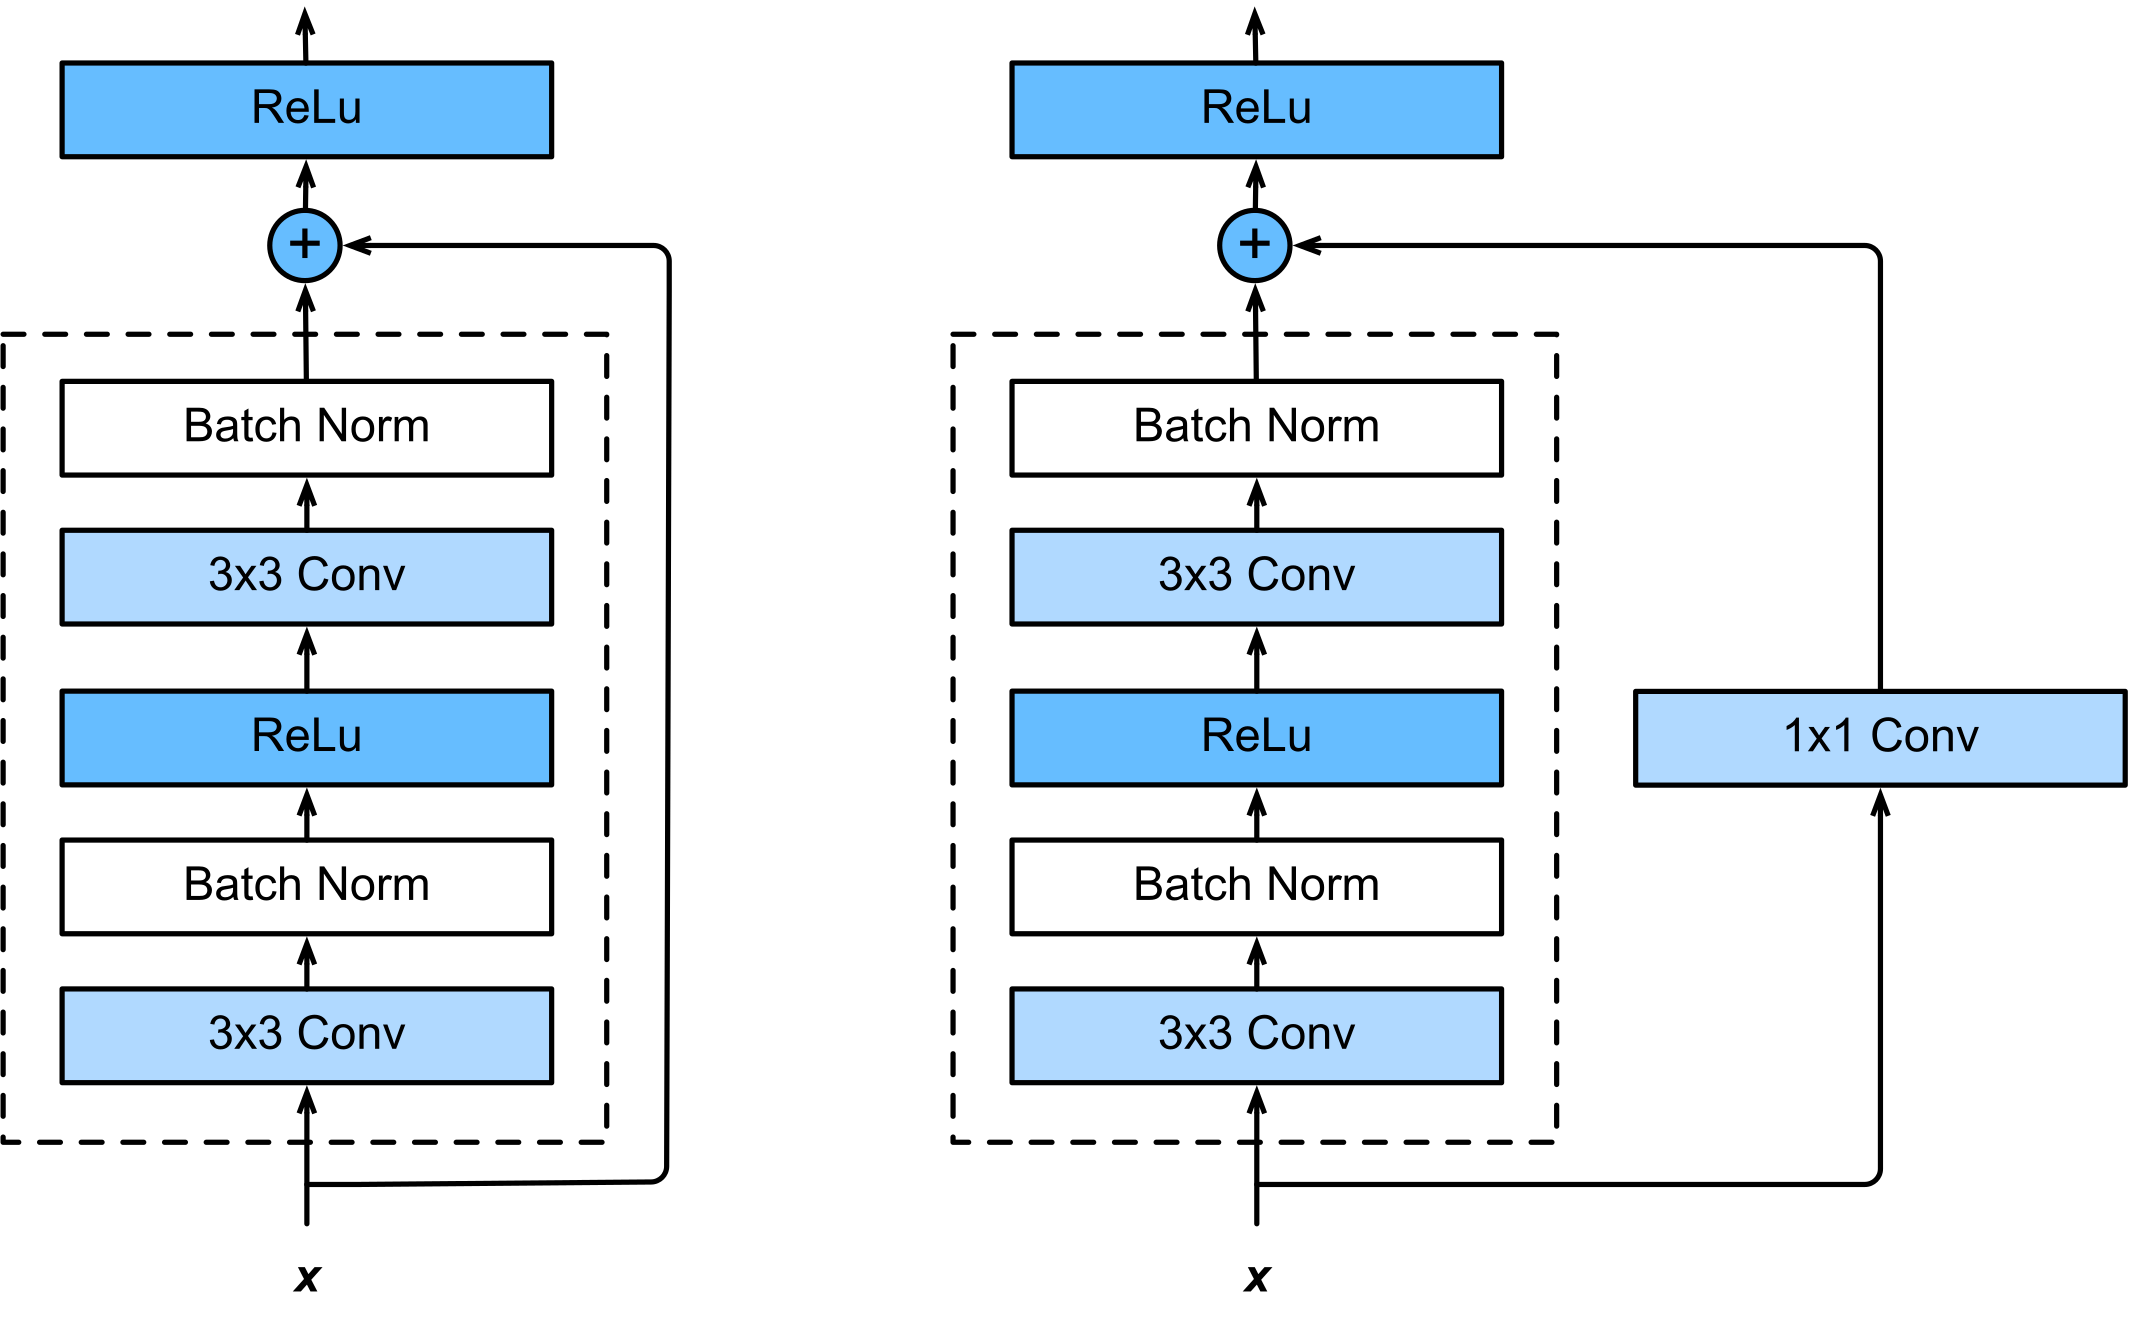

In [241]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/resnet-block.png",width=500, height=500)

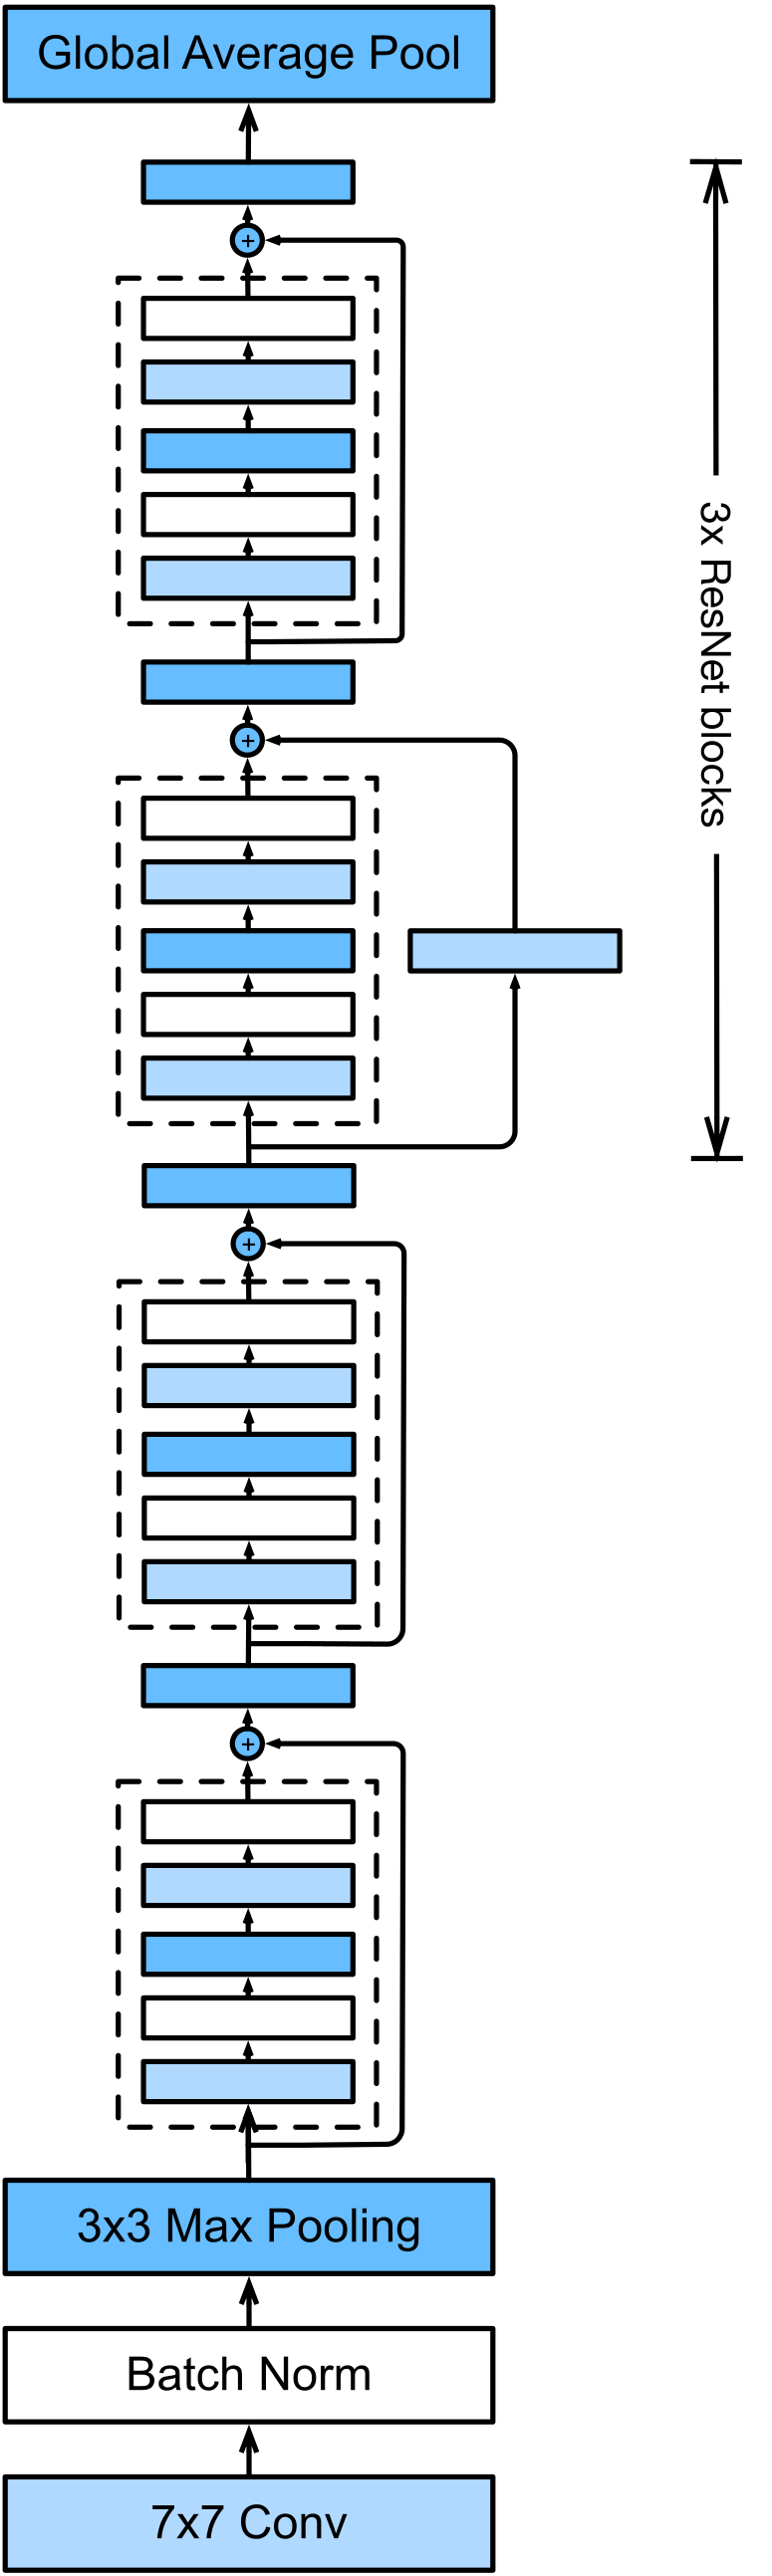

In [243]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/ResNetFull.png",width=300, height=300)

Composition of first layers similar to GoogLeNet, a stack of 4 residual blocks, and a global average pooling layer. Extensions consider more residual blocks, up to a total of 152 layers (ResNet-152). Training networks of this depth is made possible because of the skip connections in the residual blocks. They allow the gradients to shortcut the layers and pass through without vanishing.

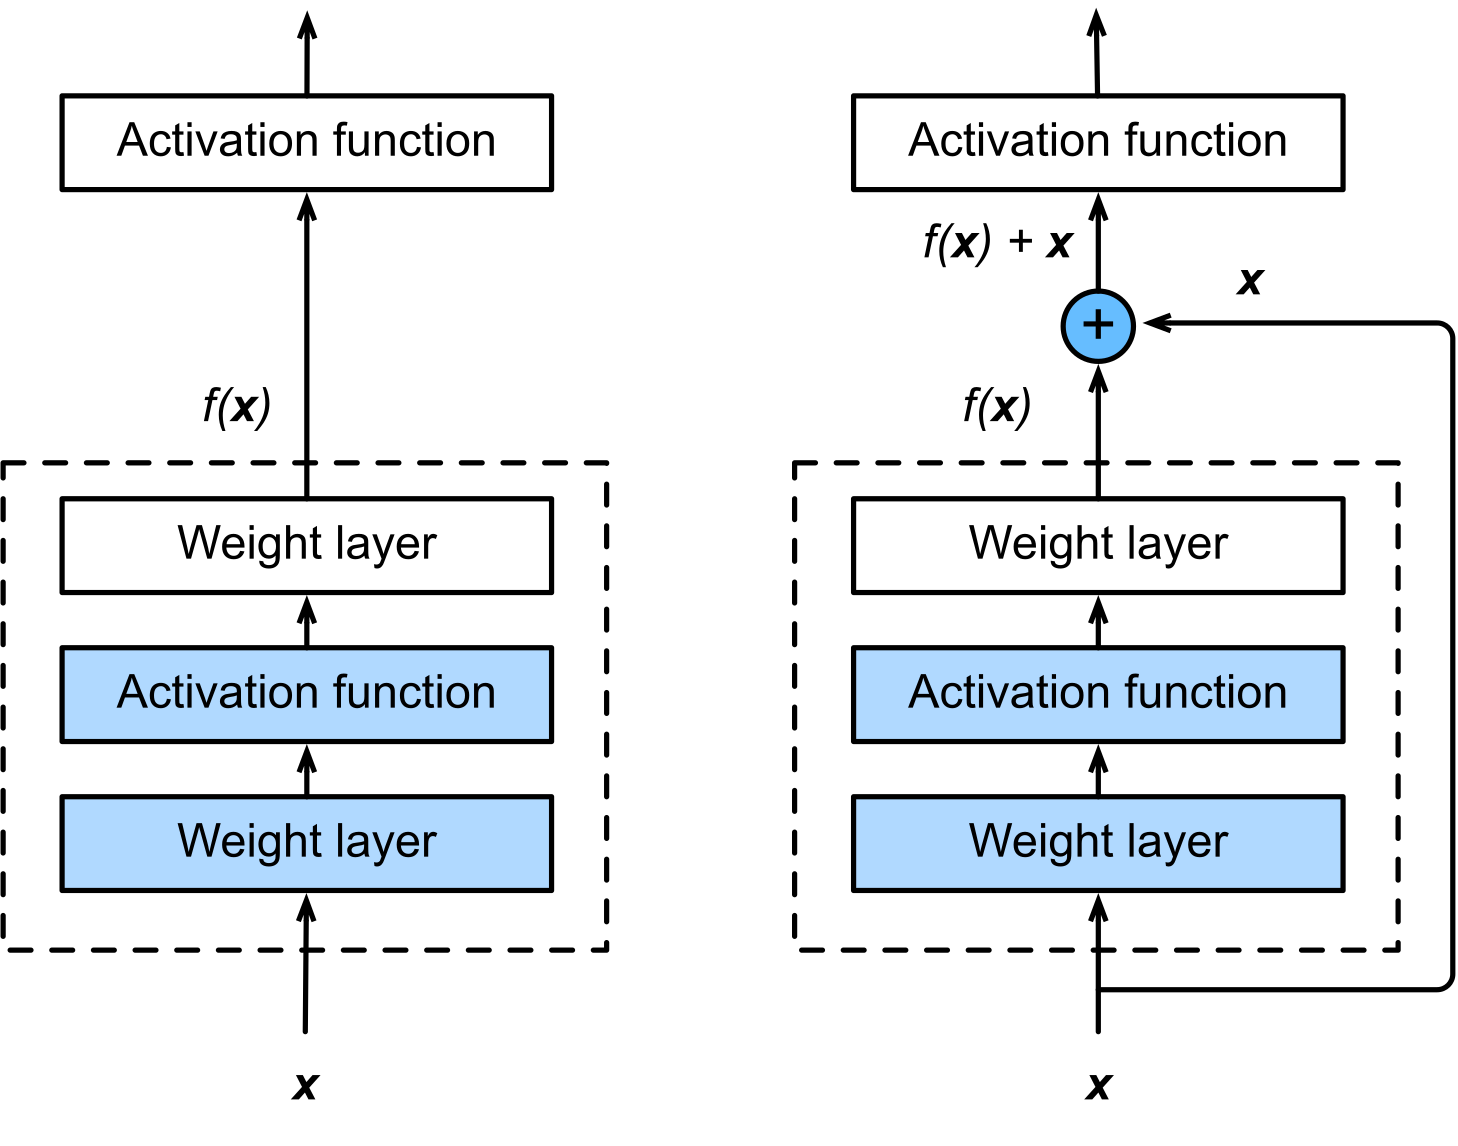

In [245]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/residual-block2.png",width=400, height=400)

    ----------------------------------------------------------------
            Layer (type)               Output Shape         Param #
    ================================================================
                Conv2d-1         [-1, 64, 112, 112]           9,408
           BatchNorm2d-2         [-1, 64, 112, 112]             128
                  ReLU-3         [-1, 64, 112, 112]               0
             MaxPool2d-4           [-1, 64, 56, 56]               0
                Conv2d-5           [-1, 64, 56, 56]           4,096
           BatchNorm2d-6           [-1, 64, 56, 56]             128
                  ReLU-7           [-1, 64, 56, 56]               0
                Conv2d-8           [-1, 64, 56, 56]          36,864
           BatchNorm2d-9           [-1, 64, 56, 56]             128
                 ReLU-10           [-1, 64, 56, 56]               0
               Conv2d-11          [-1, 256, 56, 56]          16,384
          BatchNorm2d-12          [-1, 256, 56, 56]             512
               Conv2d-13          [-1, 256, 56, 56]          16,384
          BatchNorm2d-14          [-1, 256, 56, 56]             512
                 ReLU-15          [-1, 256, 56, 56]               0
           Bottleneck-16          [-1, 256, 56, 56]               0
               Conv2d-17           [-1, 64, 56, 56]          16,384
          BatchNorm2d-18           [-1, 64, 56, 56]             128
                 ReLU-19           [-1, 64, 56, 56]               0
               Conv2d-20           [-1, 64, 56, 56]          36,864
          BatchNorm2d-21           [-1, 64, 56, 56]             128
                 ReLU-22           [-1, 64, 56, 56]               0
               Conv2d-23          [-1, 256, 56, 56]          16,384
          BatchNorm2d-24          [-1, 256, 56, 56]             512
                 ReLU-25          [-1, 256, 56, 56]               0
           Bottleneck-26          [-1, 256, 56, 56]               0
               Conv2d-27           [-1, 64, 56, 56]          16,384
          BatchNorm2d-28           [-1, 64, 56, 56]             128
                 ReLU-29           [-1, 64, 56, 56]               0
               Conv2d-30           [-1, 64, 56, 56]          36,864
          BatchNorm2d-31           [-1, 64, 56, 56]             128
                 ReLU-32           [-1, 64, 56, 56]               0
               Conv2d-33          [-1, 256, 56, 56]          16,384
          BatchNorm2d-34          [-1, 256, 56, 56]             512
                 ReLU-35          [-1, 256, 56, 56]               0
           Bottleneck-36          [-1, 256, 56, 56]               0
               Conv2d-37          [-1, 128, 56, 56]          32,768
          BatchNorm2d-38          [-1, 128, 56, 56]             256
                 ReLU-39          [-1, 128, 56, 56]               0
               Conv2d-40          [-1, 128, 28, 28]         147,456
          BatchNorm2d-41          [-1, 128, 28, 28]             256
                 ReLU-42          [-1, 128, 28, 28]               0
               Conv2d-43          [-1, 512, 28, 28]          65,536
          BatchNorm2d-44          [-1, 512, 28, 28]           1,024
               Conv2d-45          [-1, 512, 28, 28]         131,072
          BatchNorm2d-46          [-1, 512, 28, 28]           1,024
                 ReLU-47          [-1, 512, 28, 28]               0
           Bottleneck-48          [-1, 512, 28, 28]               0
               Conv2d-49          [-1, 128, 28, 28]          65,536
          BatchNorm2d-50          [-1, 128, 28, 28]             256
                 ReLU-51          [-1, 128, 28, 28]               0
               Conv2d-52          [-1, 128, 28, 28]         147,456
          BatchNorm2d-53          [-1, 128, 28, 28]             256

    ...

        ...

        Bottleneck-130         [-1, 1024, 14, 14]               0
            Conv2d-131          [-1, 256, 14, 14]         262,144
        BatchNorm2d-132          [-1, 256, 14, 14]             512
              ReLU-133          [-1, 256, 14, 14]               0
            Conv2d-134          [-1, 256, 14, 14]         589,824
        BatchNorm2d-135          [-1, 256, 14, 14]             512
              ReLU-136          [-1, 256, 14, 14]               0
            Conv2d-137         [-1, 1024, 14, 14]         262,144
        BatchNorm2d-138         [-1, 1024, 14, 14]           2,048
              ReLU-139         [-1, 1024, 14, 14]               0
        Bottleneck-140         [-1, 1024, 14, 14]               0
            Conv2d-141          [-1, 512, 14, 14]         524,288
        BatchNorm2d-142          [-1, 512, 14, 14]           1,024
              ReLU-143          [-1, 512, 14, 14]               0
            Conv2d-144            [-1, 512, 7, 7]       2,359,296
        BatchNorm2d-145            [-1, 512, 7, 7]           1,024
              ReLU-146            [-1, 512, 7, 7]               0
            Conv2d-147           [-1, 2048, 7, 7]       1,048,576
        BatchNorm2d-148           [-1, 2048, 7, 7]           4,096
            Conv2d-149           [-1, 2048, 7, 7]       2,097,152
        BatchNorm2d-150           [-1, 2048, 7, 7]           4,096
              ReLU-151           [-1, 2048, 7, 7]               0
        Bottleneck-152           [-1, 2048, 7, 7]               0
            Conv2d-153            [-1, 512, 7, 7]       1,048,576
        BatchNorm2d-154            [-1, 512, 7, 7]           1,024
              ReLU-155            [-1, 512, 7, 7]               0
            Conv2d-156            [-1, 512, 7, 7]       2,359,296
        BatchNorm2d-157            [-1, 512, 7, 7]           1,024
              ReLU-158            [-1, 512, 7, 7]               0
            Conv2d-159           [-1, 2048, 7, 7]       1,048,576
        BatchNorm2d-160           [-1, 2048, 7, 7]           4,096
              ReLU-161           [-1, 2048, 7, 7]               0
        Bottleneck-162           [-1, 2048, 7, 7]               0
            Conv2d-163            [-1, 512, 7, 7]       1,048,576
        BatchNorm2d-164            [-1, 512, 7, 7]           1,024
              ReLU-165            [-1, 512, 7, 7]               0
            Conv2d-166            [-1, 512, 7, 7]       2,359,296
        BatchNorm2d-167            [-1, 512, 7, 7]           1,024
              ReLU-168            [-1, 512, 7, 7]               0
            Conv2d-169           [-1, 2048, 7, 7]       1,048,576
        BatchNorm2d-170           [-1, 2048, 7, 7]           4,096
              ReLU-171           [-1, 2048, 7, 7]               0
        Bottleneck-172           [-1, 2048, 7, 7]               0
         AvgPool2d-173           [-1, 2048, 1, 1]               0
            Linear-174                 [-1, 1000]       2,049,000
        ================================================================
        Total params: 25,557,032                                        
        Trainable params: 25,557,032                                    
        Non-trainable params: 0                                         
        ----------------------------------------------------------------
        Input size (MB): 0.57                                           
        Forward/backward pass size (MB): 286.56                         
        Params size (MB): 97.49                                         
        Estimated Total Size (MB): 384.62                               
        ----------------------------------------------------------------

## Depth?

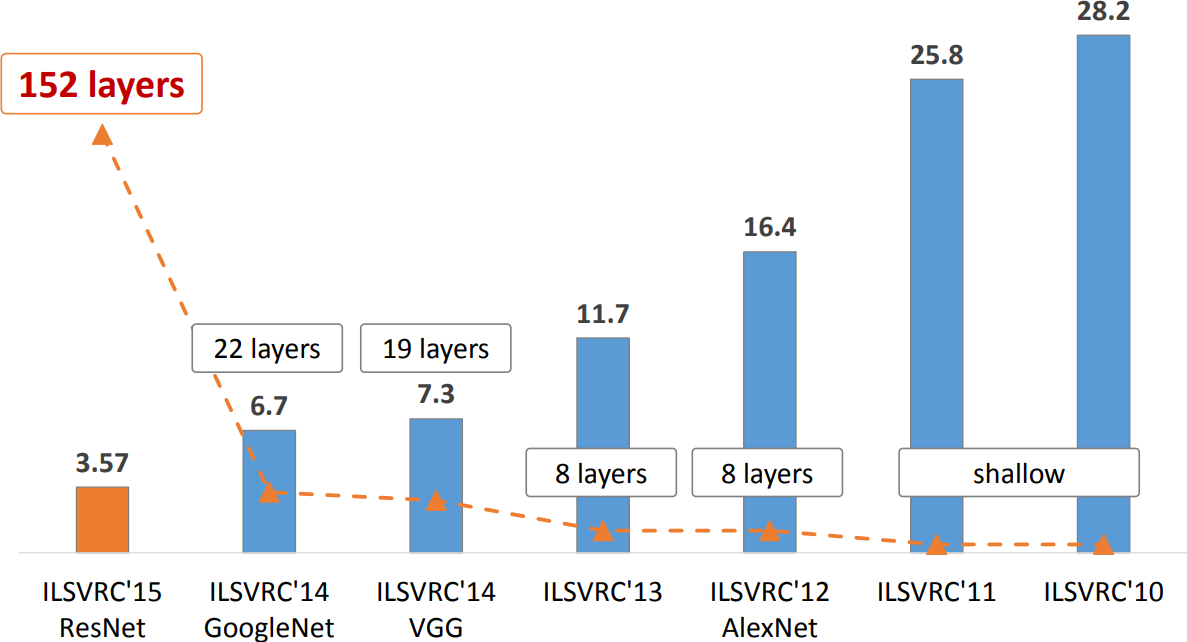

In [249]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./images/imagenet.png",width=600, height=600)

Why did we do all these DNN architecture review.

    - Maybe you can become a researcher and work on developping a new one -:)
    - We will use these in transfer learning